In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib 
from matplotlib import pyplot as plt
import gc
import multiprocessing as mp
from multiprocessing import Process, Queue
queue = Queue()
import random
from matplotlib.pyplot import figure

In [2]:
def read_df(file_title,house_nb):
    try:
        df=pd.read_table(file_title, sep="," )
        df.columns = ["time","consumption"]
        try:
            df['time'] = pd.to_datetime(df['time'],unit='s')
        except:
            df['time'] = pd.to_datetime(df['time'])
        df.index= df.time
        df = df.sort_index()
        df.reset_index(drop=True, inplace=True)
        return (df,house_nb)
    except:
        return(None)

In [3]:
def find_Activations (df,house_nb,minimum_durations,threshold=20):
  On_consumption=[]
  a = False
  min_duration=minimum_durations[house_nb]
  for index in df.index[0:]:
    if ((df.consumption[index]>=threshold) and (a==False)):
      a=True
      start=index
    elif ((df.consumption[index] < threshold ) and (a==True)):
      a=False 
      end=index-1
      if ((end-start)>=min_duration):
       On_consumption.append((start,end))
  return ((On_consumption,house_nb))

In [4]:
pool = mp.Pool(processes = 3)
result=pool.starmap(read_df,(("Refit_Resampled/fridge/house_"+str(i+1)+".csv",i+1) for i in range(21)))

In [5]:
Refit_fridges={}
for i in range(len(result)):
    if result[i]!=None:
        Refit_fridges[result[i][1]]=result[i][0]

In [7]:
min_durations_fridges={1:20,4:17,7:4,8:4,11:16,18:4,20:4}
for key in min_durations_fridges.keys():
    min_durations_fridges[key]=min_durations_fridges[key]*6

In [8]:
pool = mp.Pool(processes = 3)
result=pool.starmap(find_Activations,((Refit_fridges[i],i,min_durations_fridges) for i in Refit_fridges.keys()))

In [9]:
Refit_fridge_activations={}
for i in range(len(result)):
    Refit_fridge_activations[result[i][1]]=result[i][0]

In [10]:
Refit_fridge_activations.keys()

dict_keys([1, 4, 7, 8, 11, 18, 20])

Once you have the activations stored in a csv file you no longer need to use the find_activations function which takes a long time to execute

In [15]:
def csv_to_activations(file_title):
    df=pd.read_table(file_title, sep="," )
    df = df[['beginning', 'end']]
    activation = [tuple(x) for x in df.to_numpy()]
    return(activation)

In [16]:
Refit_fridge_activations={}
for house_nb in Refit_fridges.keys():
    Refit_fridge_activations[house_nb]=csv_to_activations("Refit_activations/fridge/house_"+str(house_nb))

In [24]:
Refit_fridge_activations.keys()

dict_keys([1, 4, 7, 8, 11, 18, 20])

In [18]:
def add_margin(activation_list,df_length,margin=1):
  on_consumptions=[]
  for activation_tuple in activation_list:
    if ((activation_tuple[0]-margin)>=0):
      start=activation_tuple[0]-margin
    else:
      start=0
    if ((activation_tuple[1]+margin)<=df_length):
      end=activation_tuple[1]+margin
    else:
      end=df_length
    on_consumptions.append((start,end))
  return(on_consumptions)

In [19]:
Refit_fridge_activations_margin={}
for key in Refit_fridge_activations.keys():
    Refit_fridge_activations_margin[key]=add_margin(Refit_fridge_activations[key],len(Refit_fridges[key].index),2)

In [20]:
print(Refit_fridge_activations_margin[1][1])
print(Refit_fridge_activations[1][1])

(1399, 1574)
(1401, 1572)


In [21]:
Refit_fridge_activations=Refit_fridge_activations_margin

/home/mahdi/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


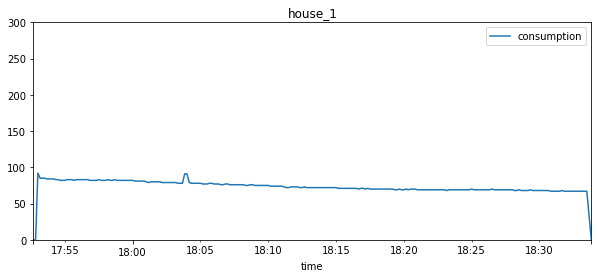

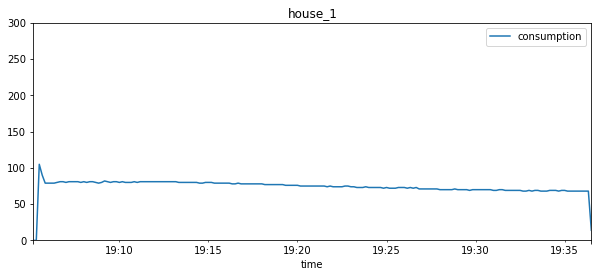

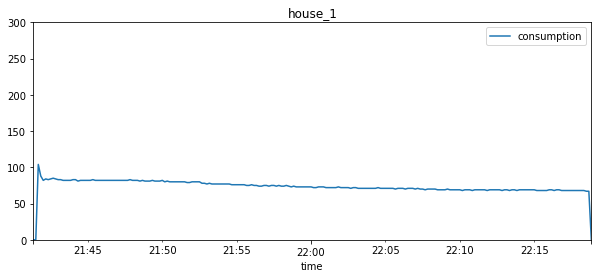

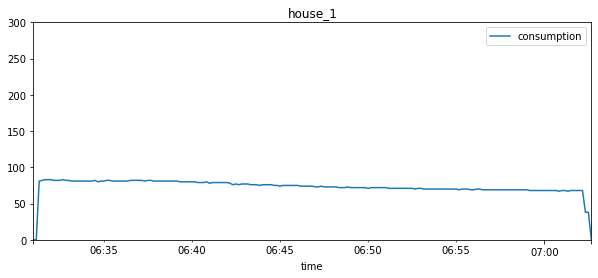

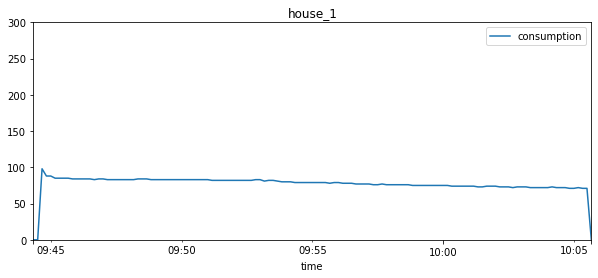

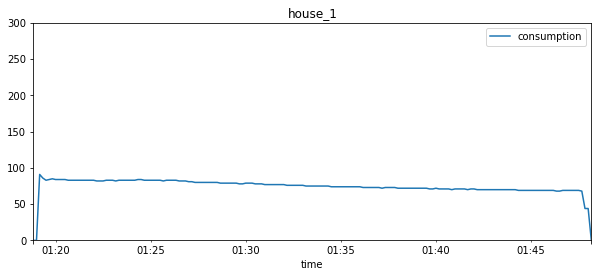

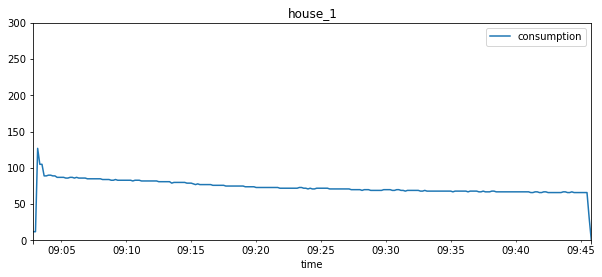

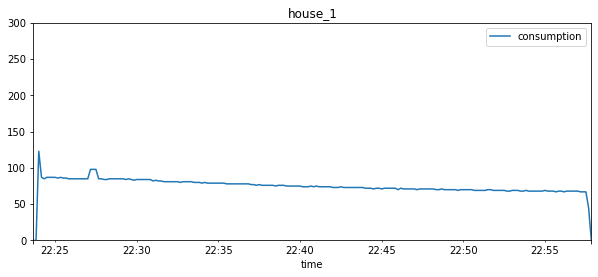

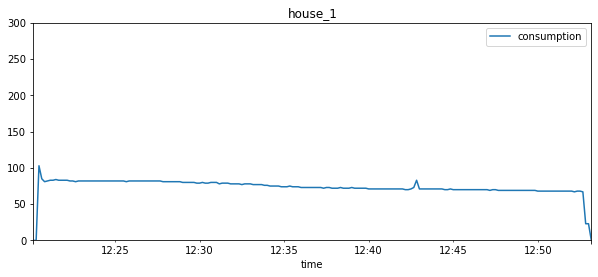

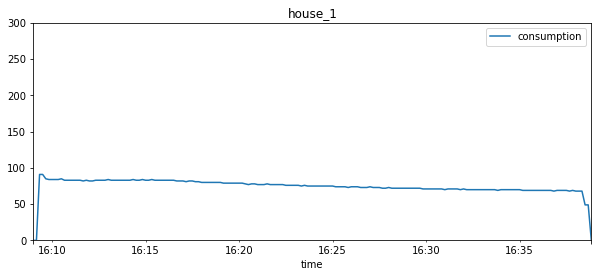

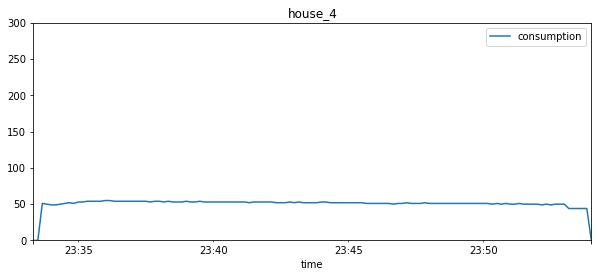

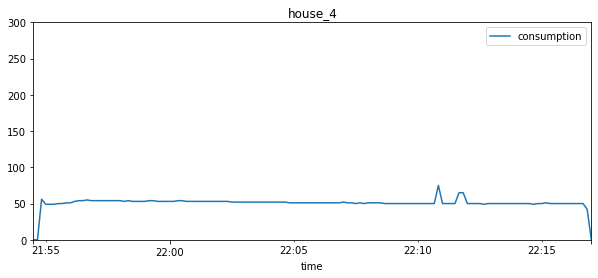

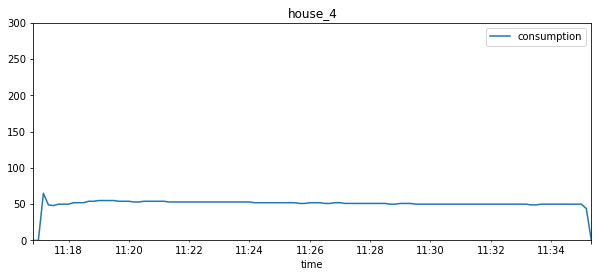

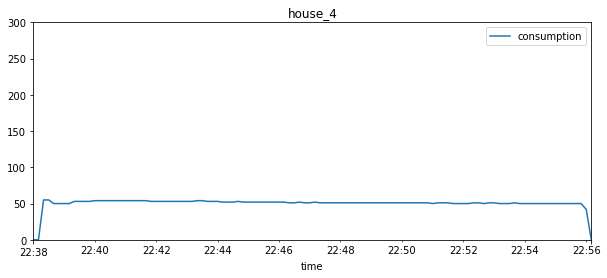

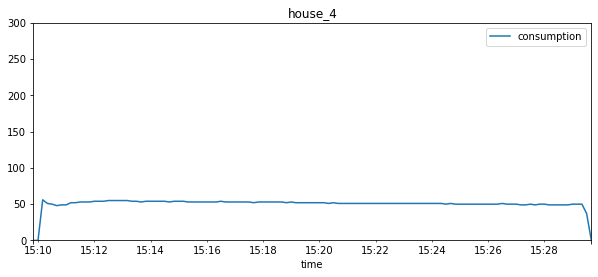

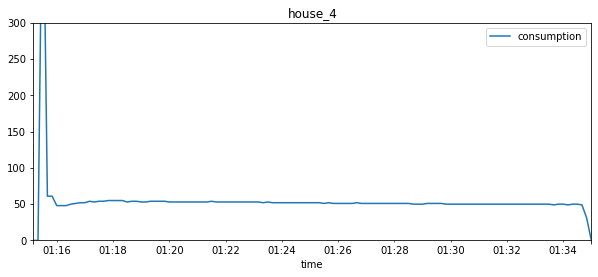

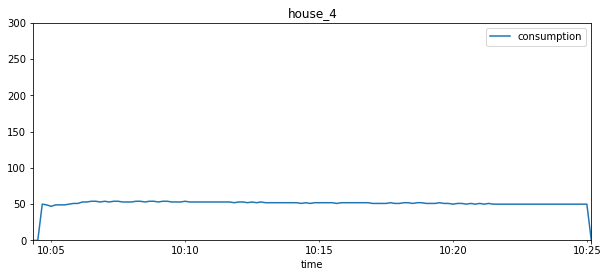

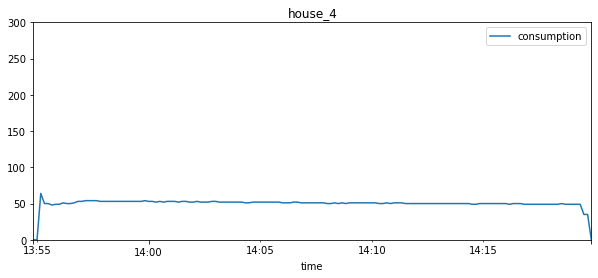

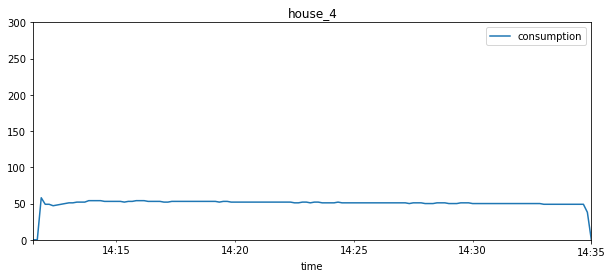

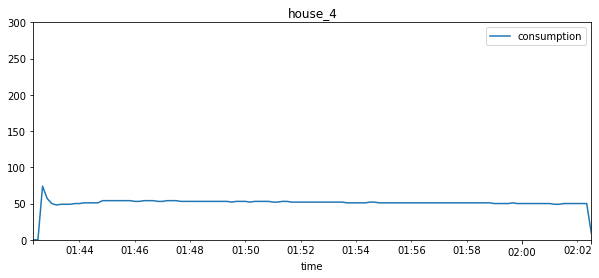

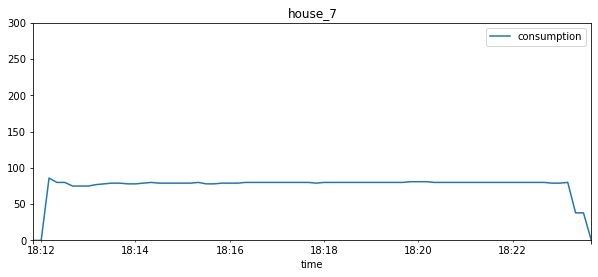

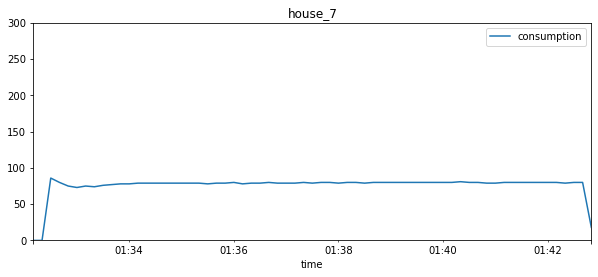

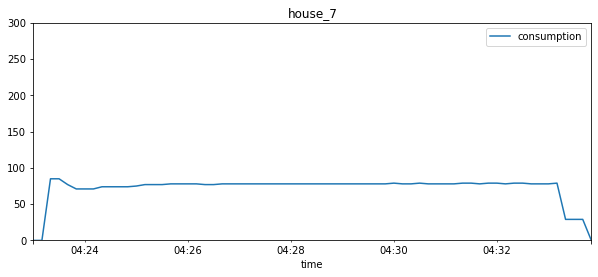

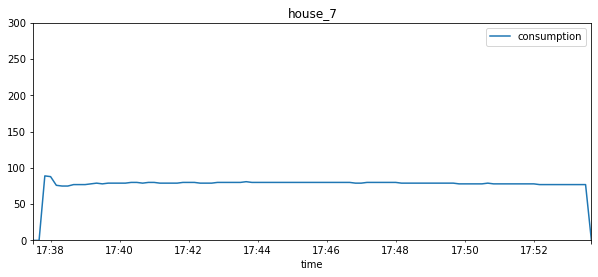

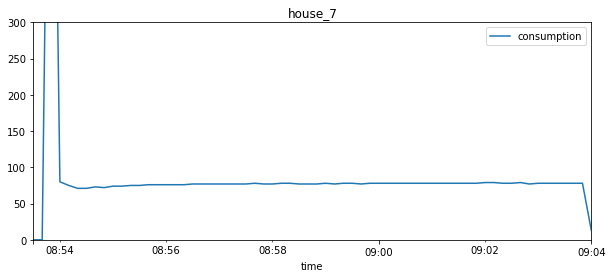

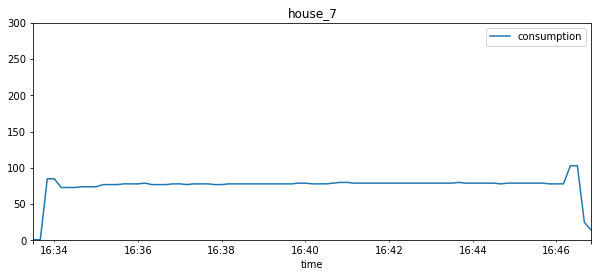

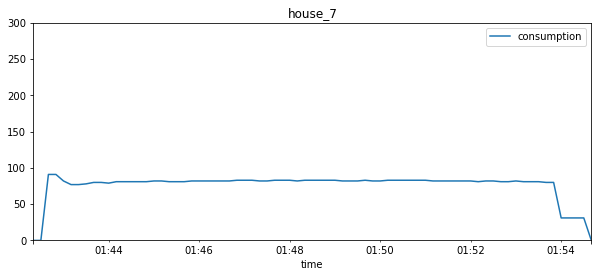

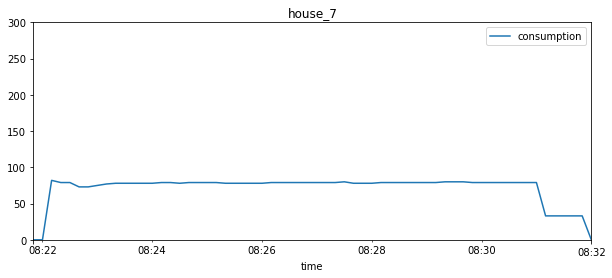

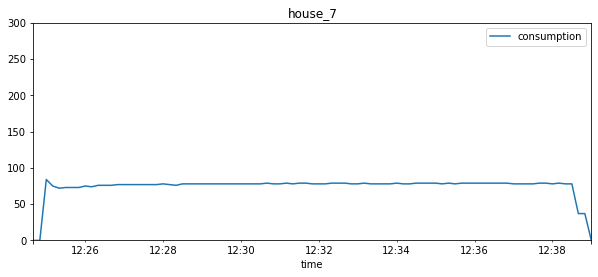

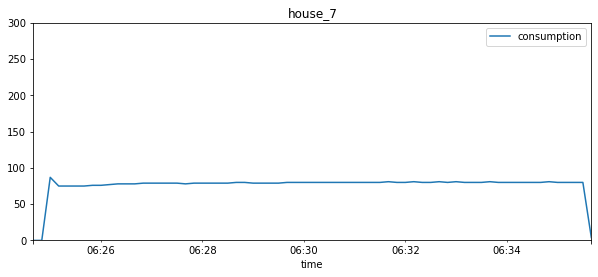

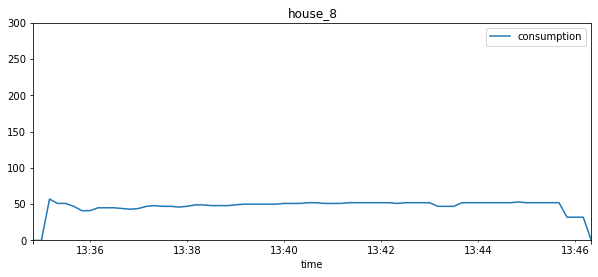

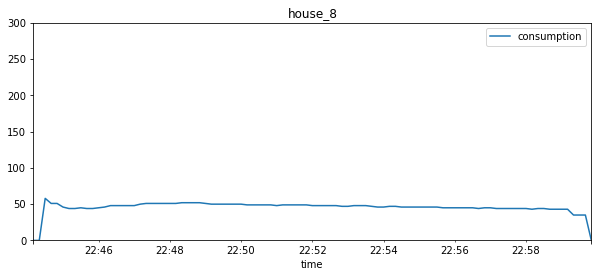

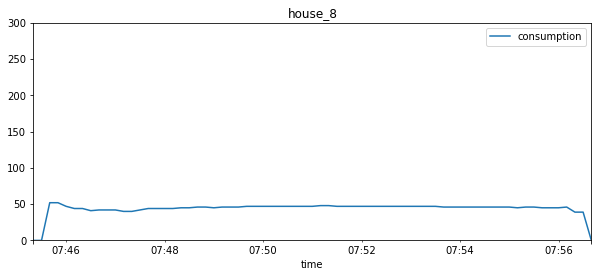

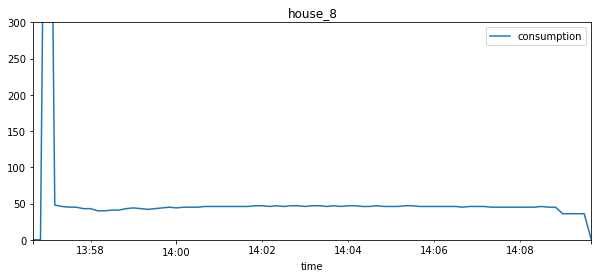

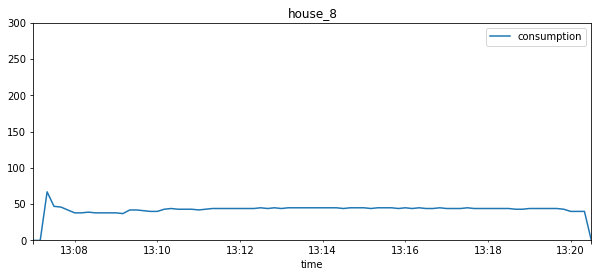

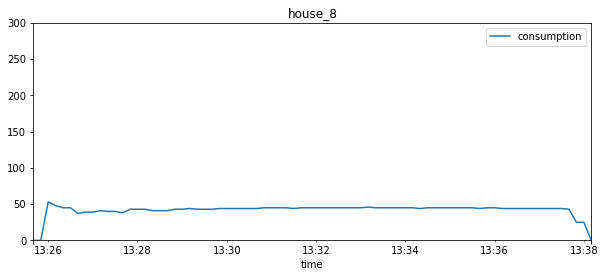

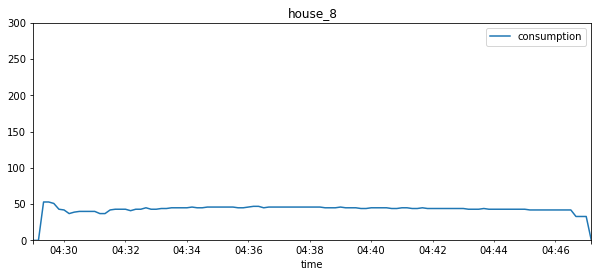

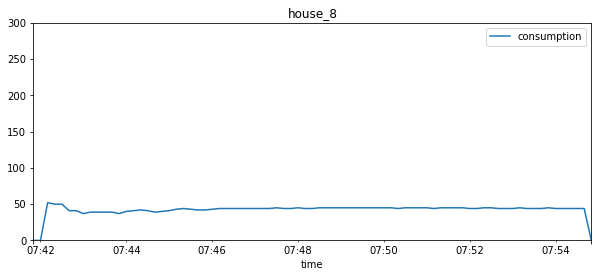

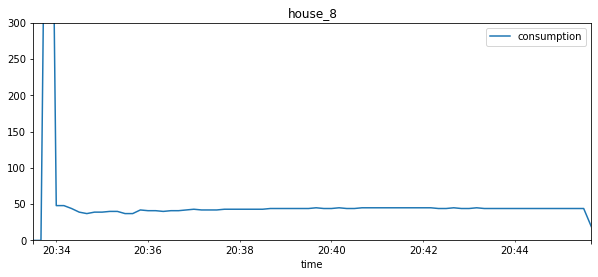

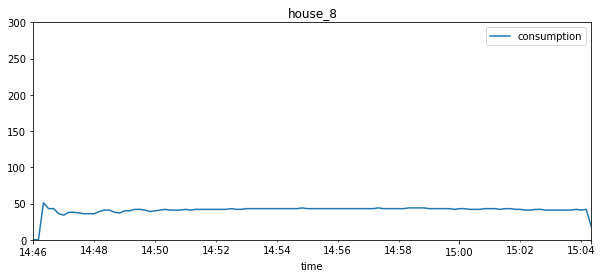

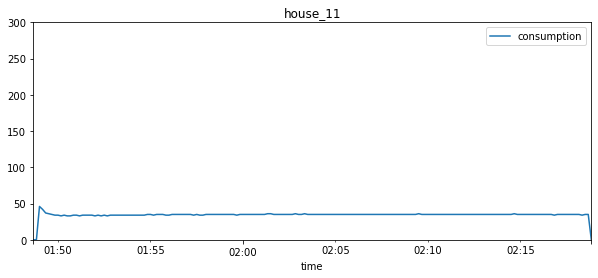

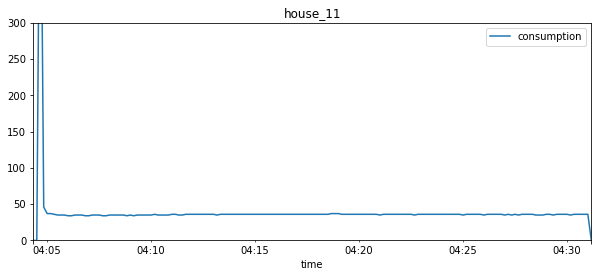

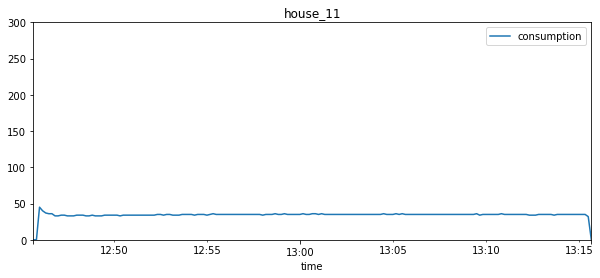

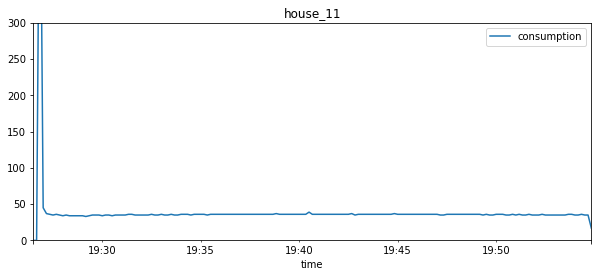

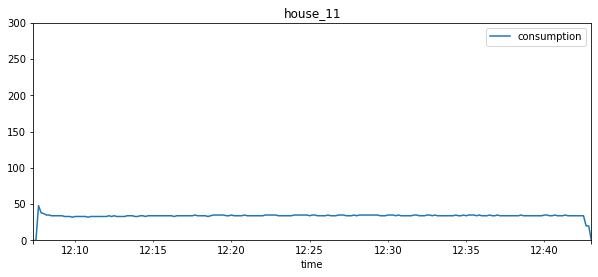

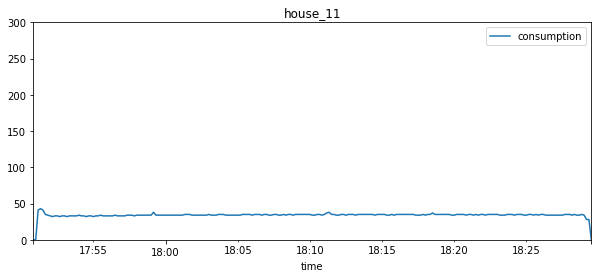

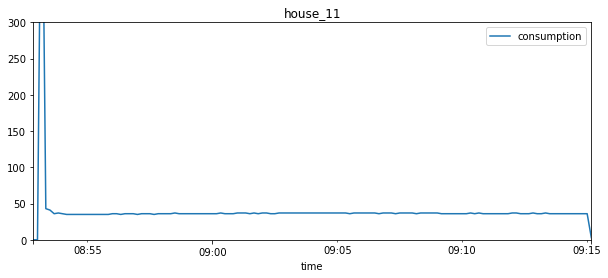

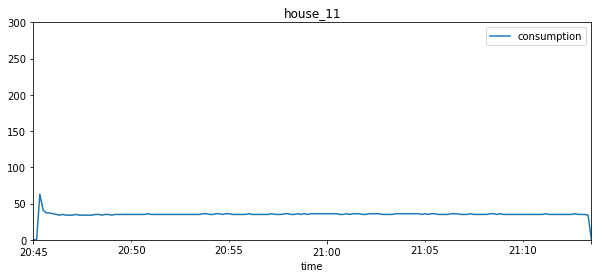

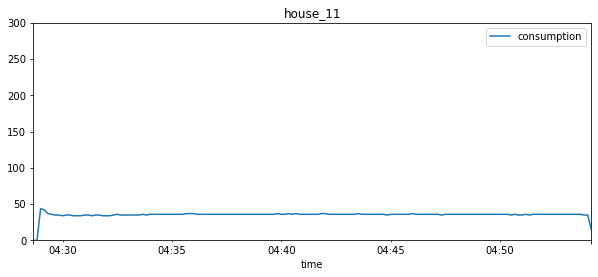

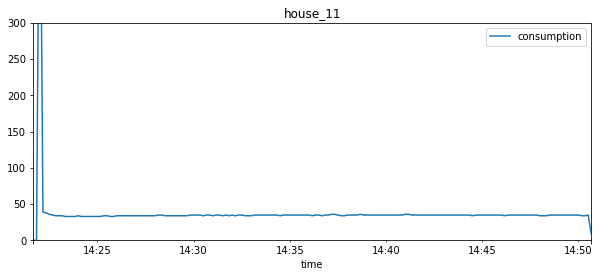

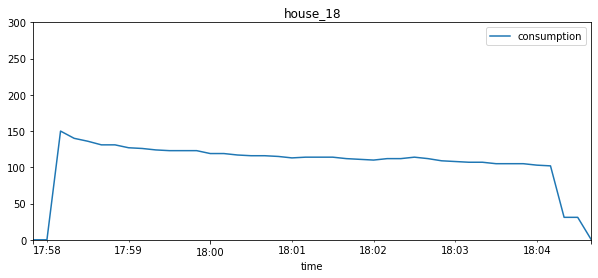

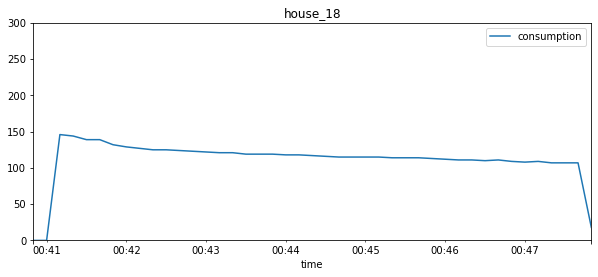

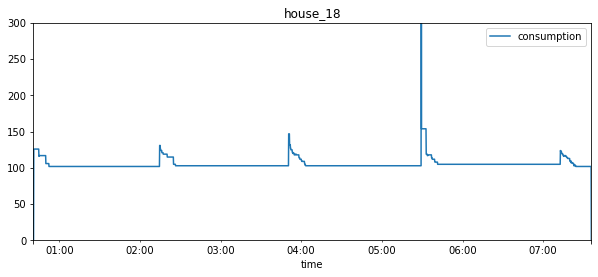

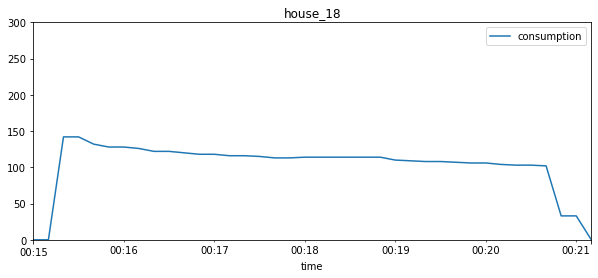

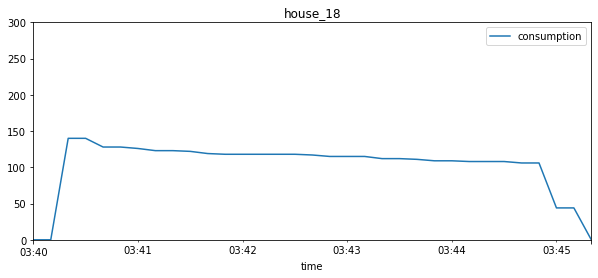

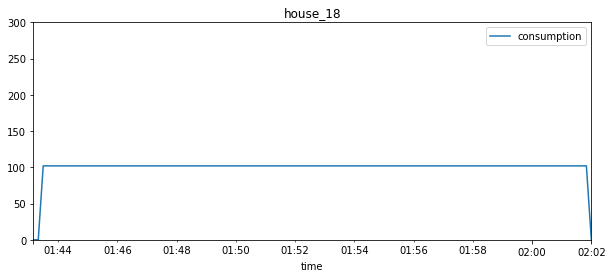

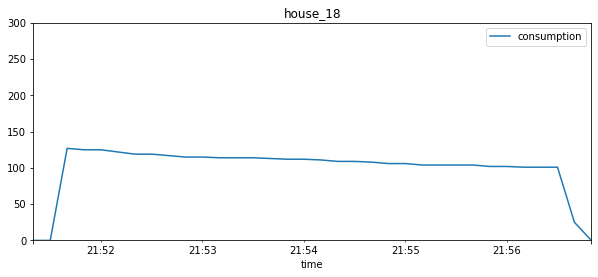

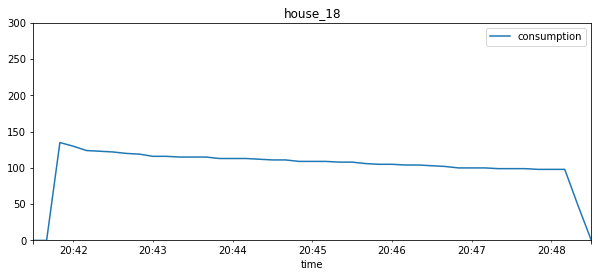

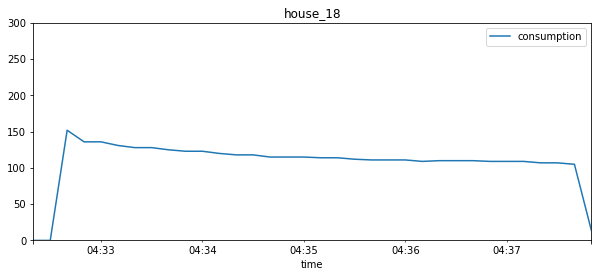

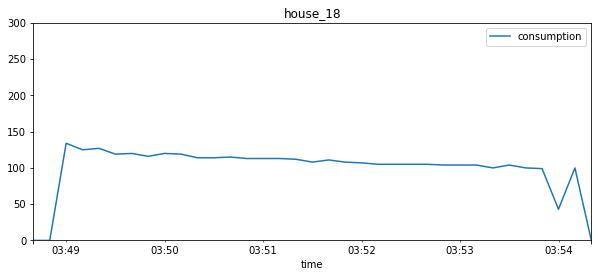

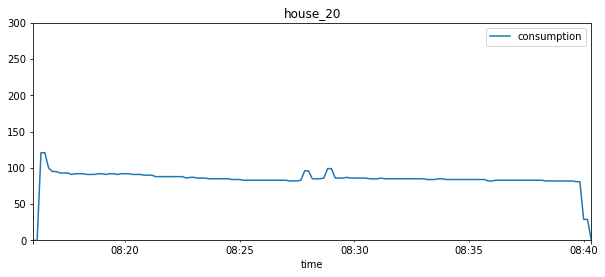

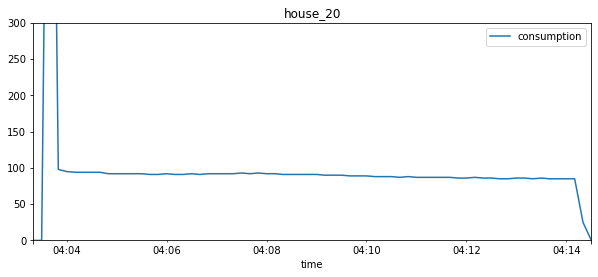

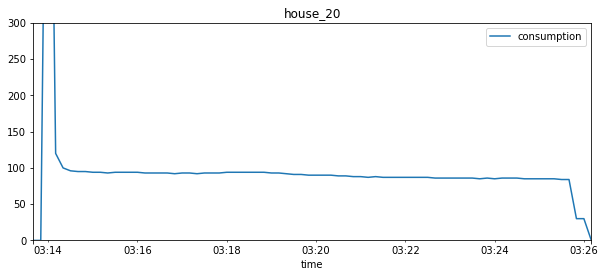

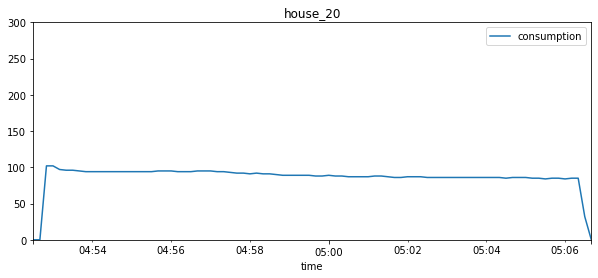

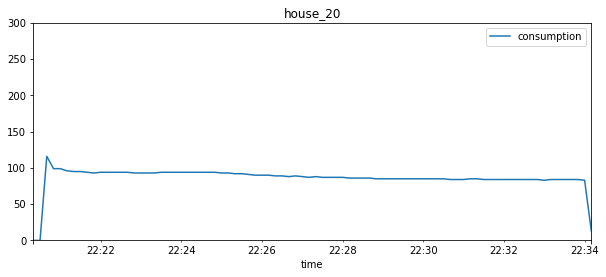

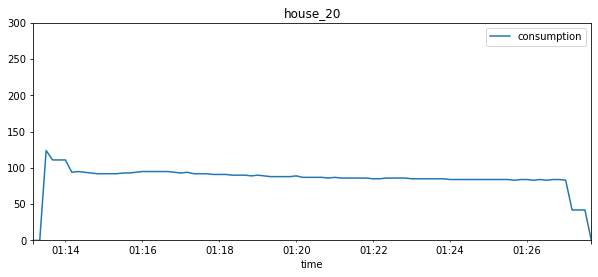

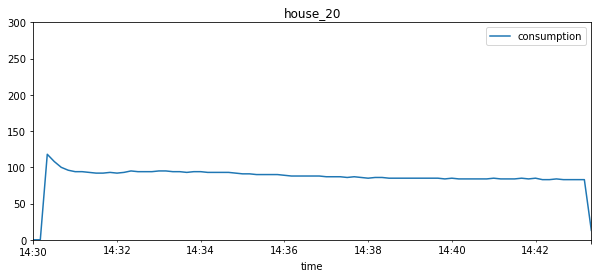

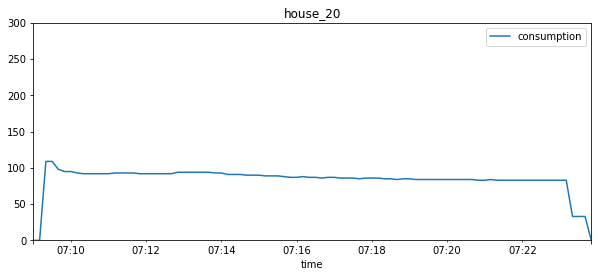

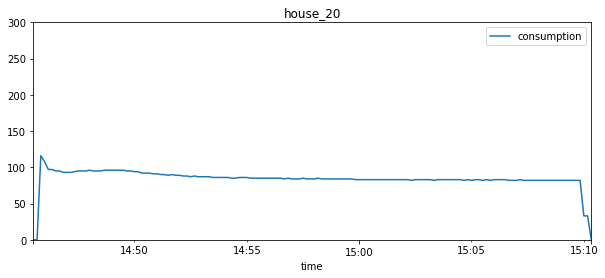

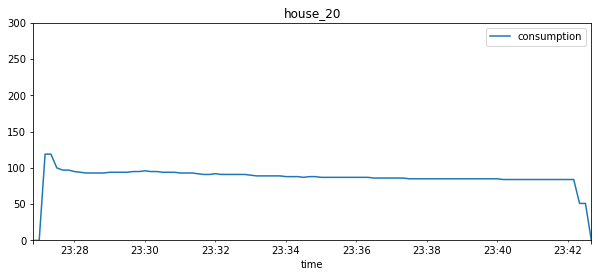

In [22]:
for house in Refit_fridges.keys():
    activations=random.sample(range(0, len(Refit_fridge_activations[house])),10)
    df=Refit_fridges[house]
    for activation in activations:
        beginning=Refit_fridge_activations[house][activation][0]
        end=Refit_fridge_activations[house][activation][1]
        ax=df.iloc[beginning:end].plot(x="time",y=['consumption'], figsize=(10,4),title="house_"+str(house))
        ax.set_ylim(0,300)

/home/mahdi/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


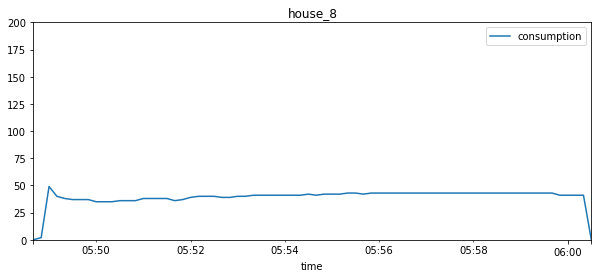

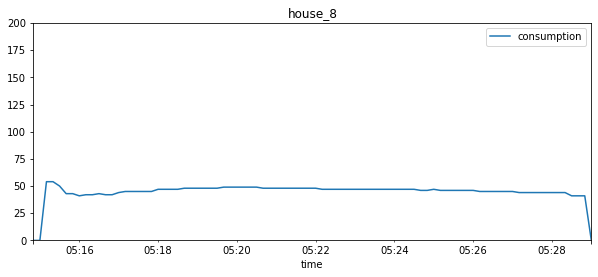

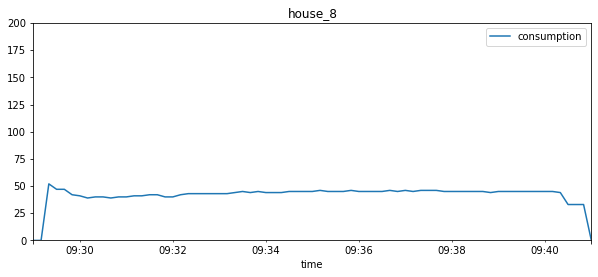

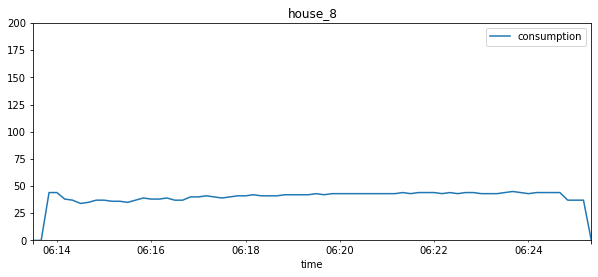

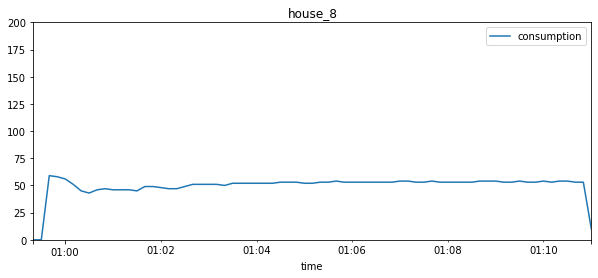

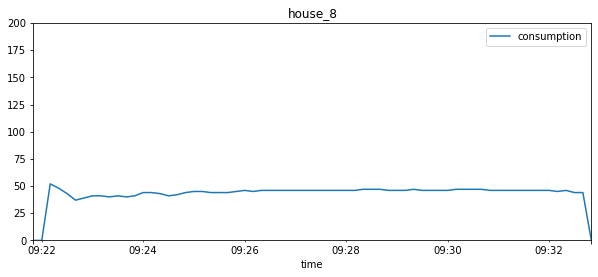

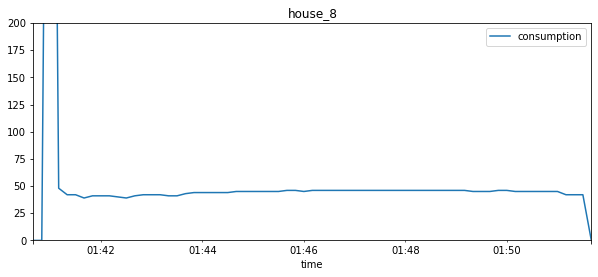

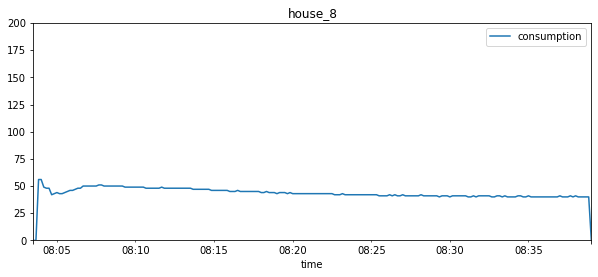

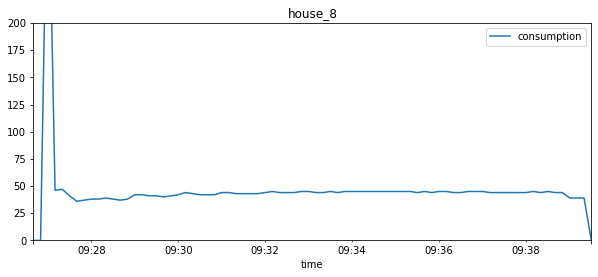

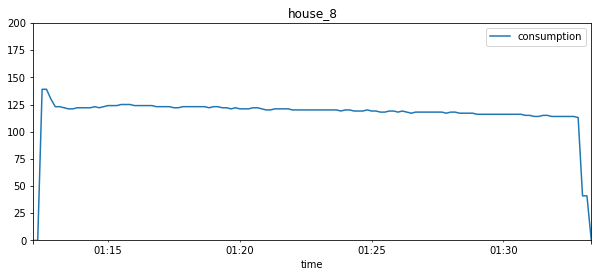

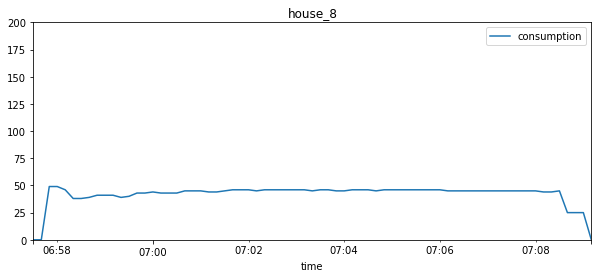

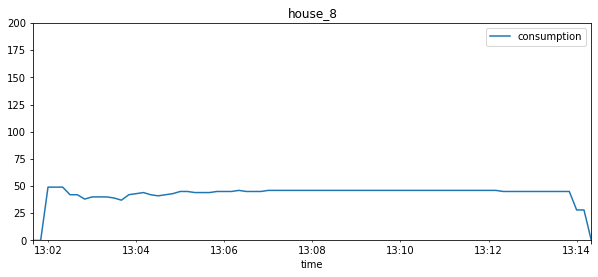

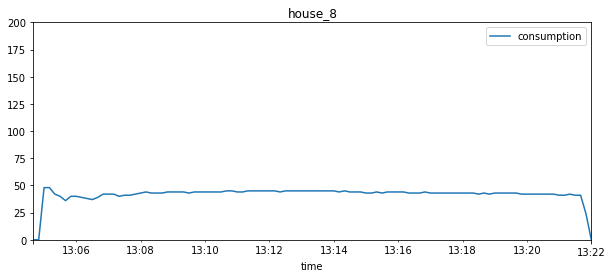

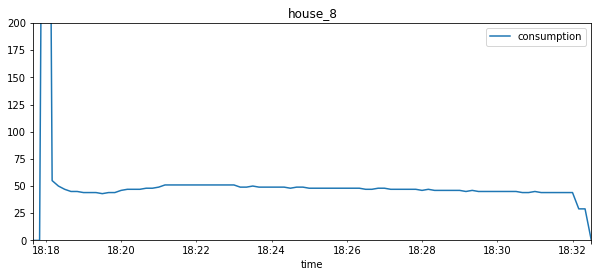

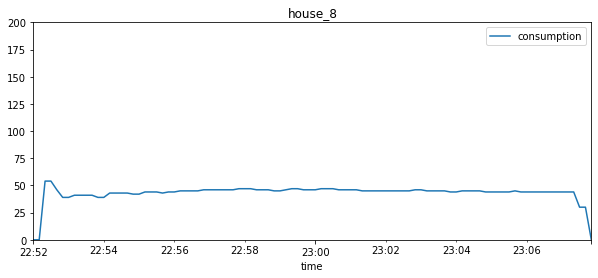

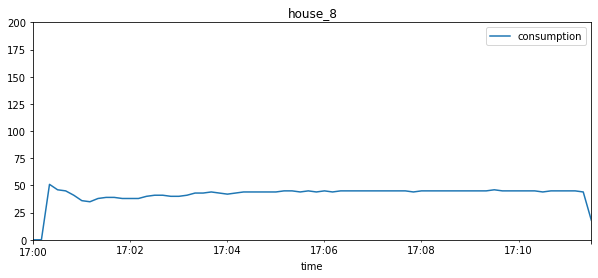

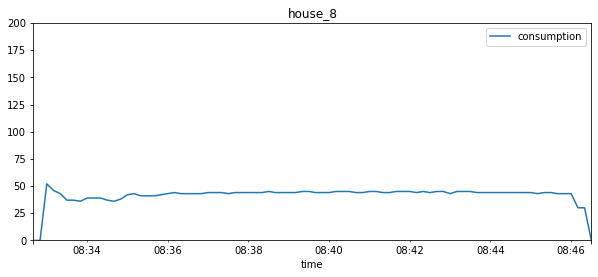

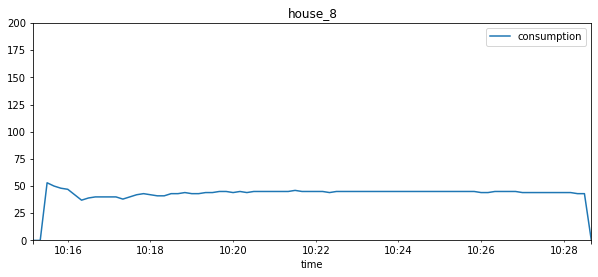

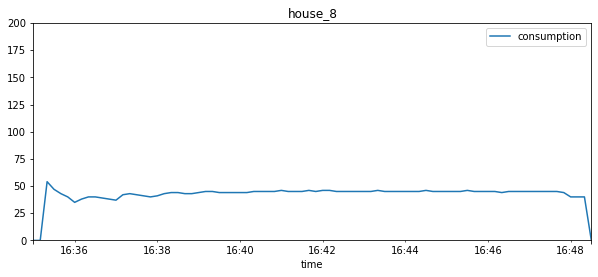

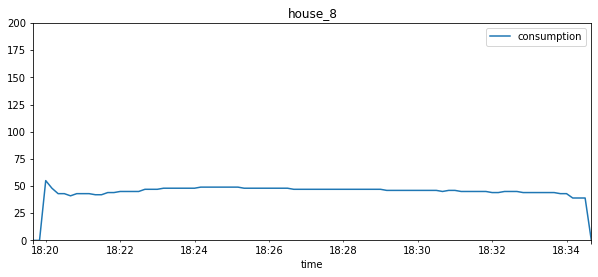

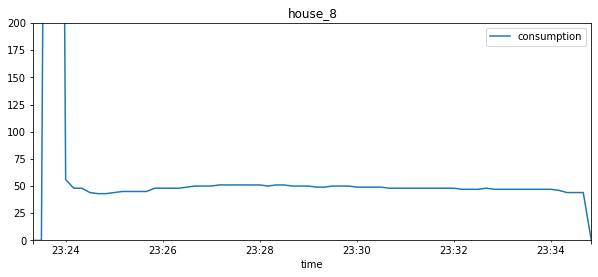

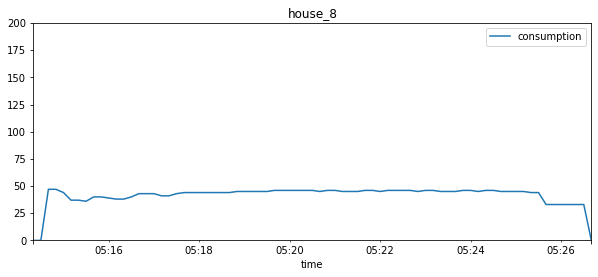

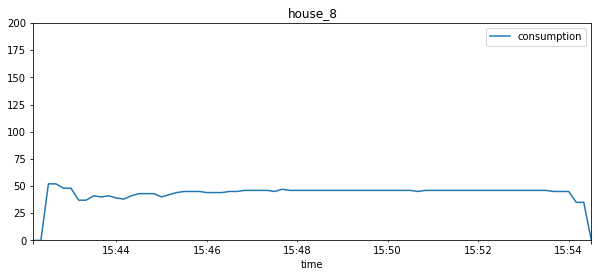

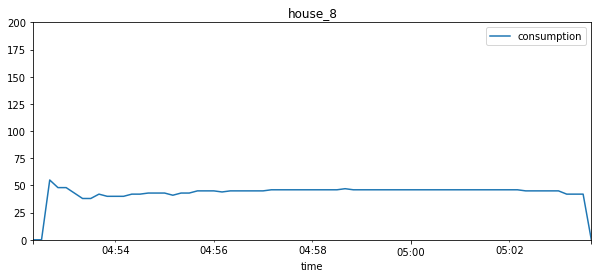

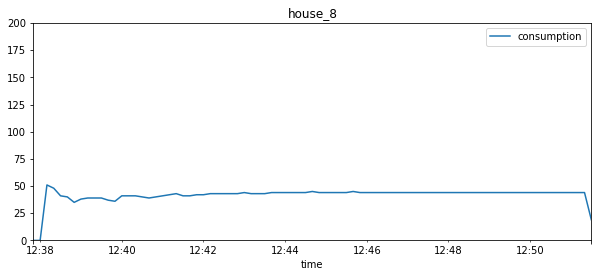

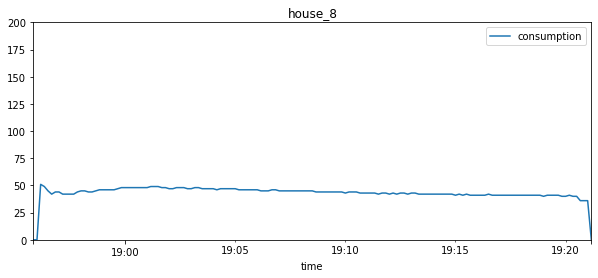

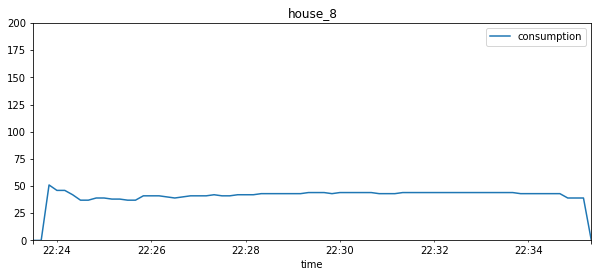

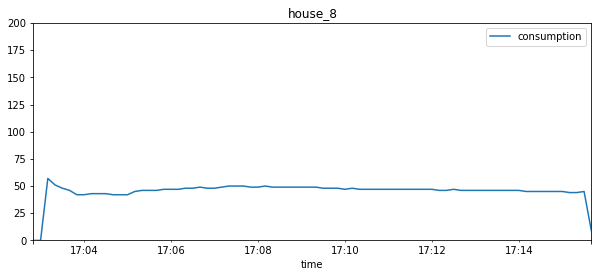

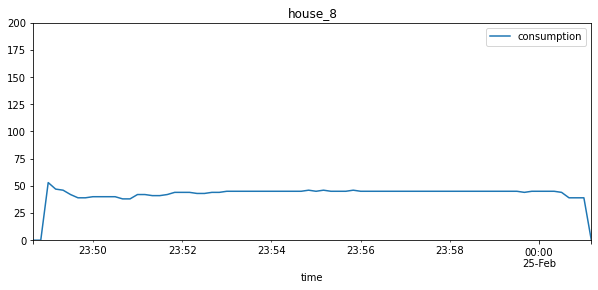

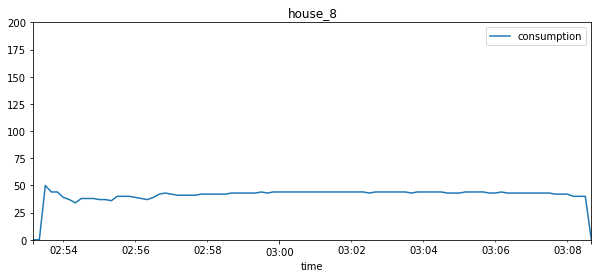

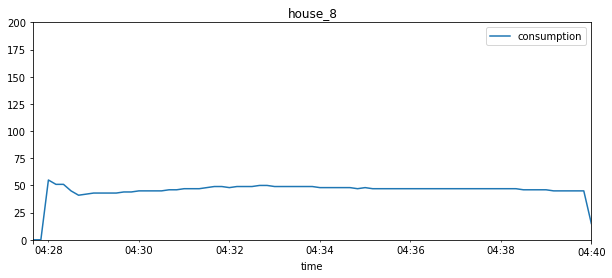

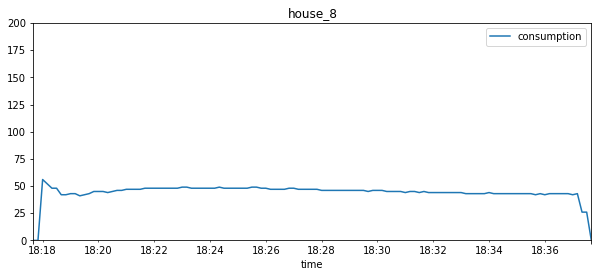

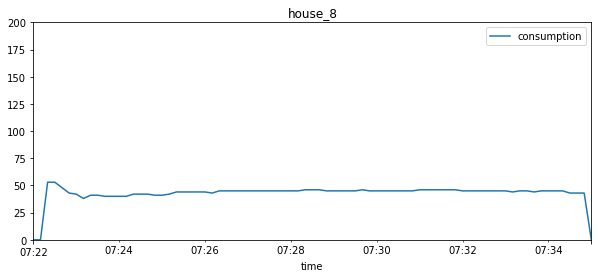

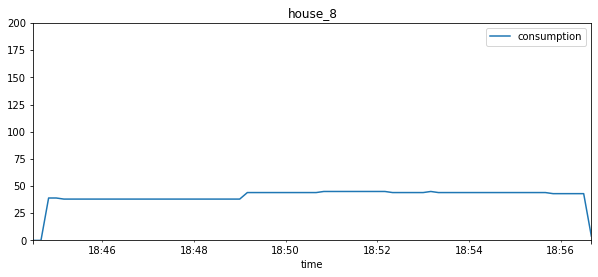

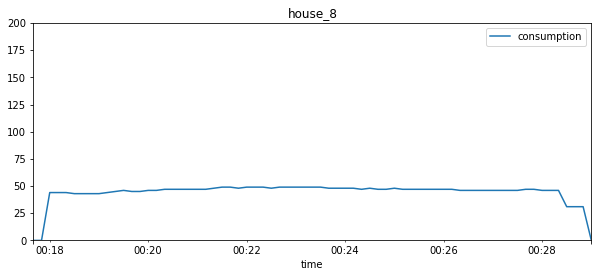

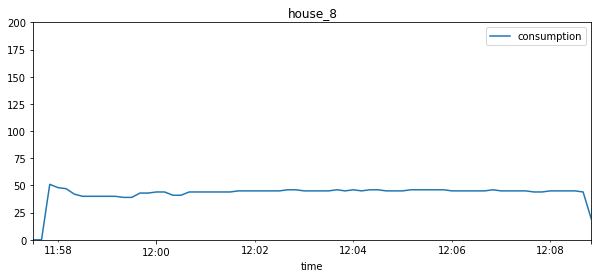

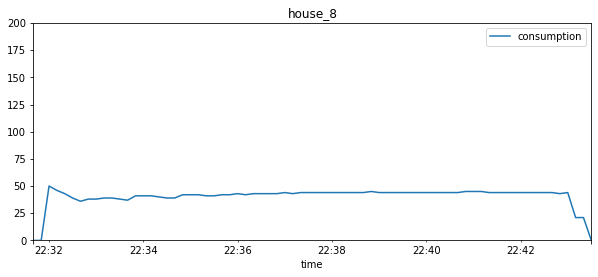

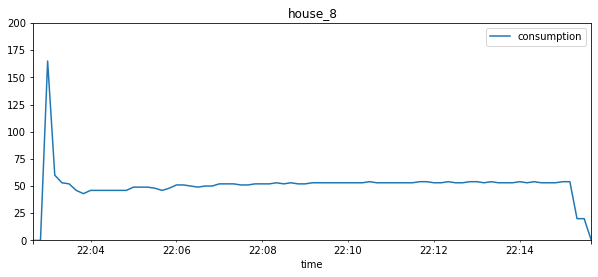

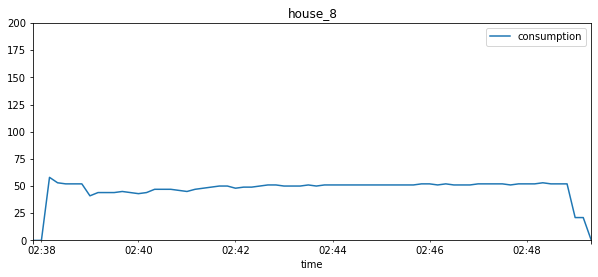

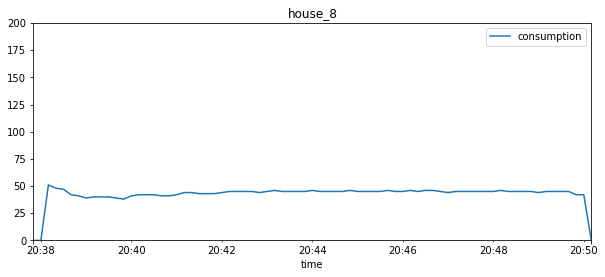

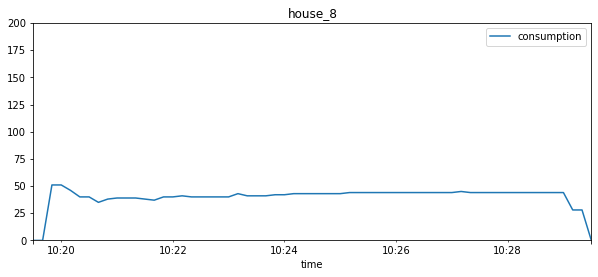

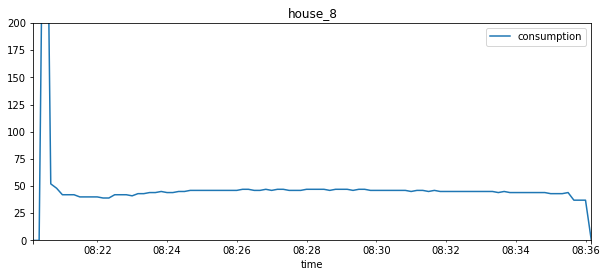

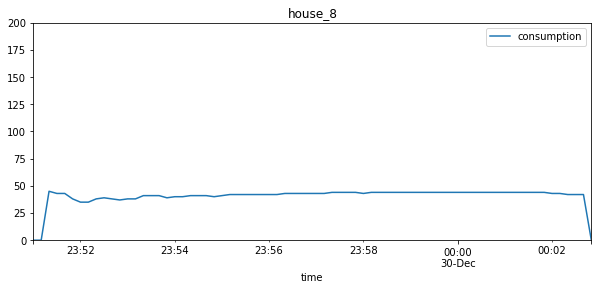

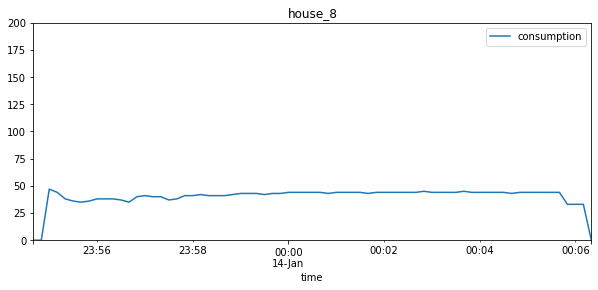

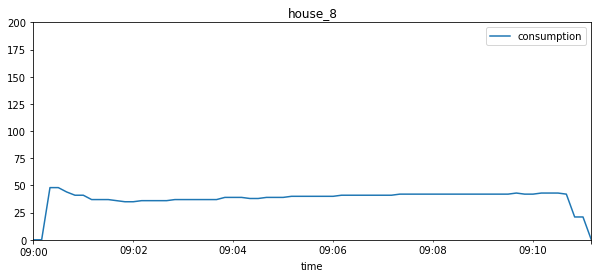

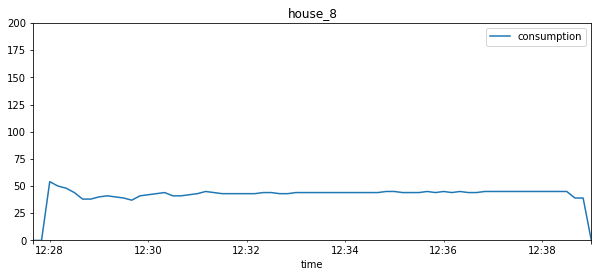

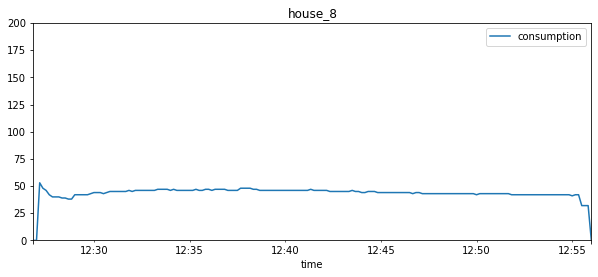

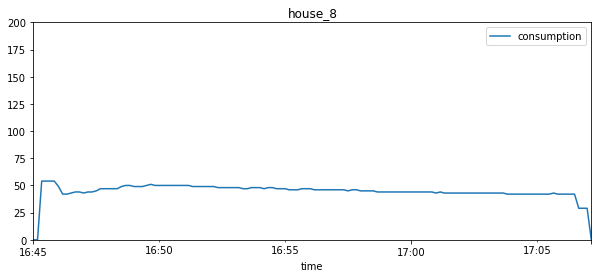

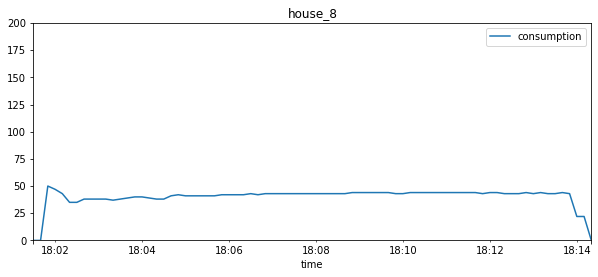

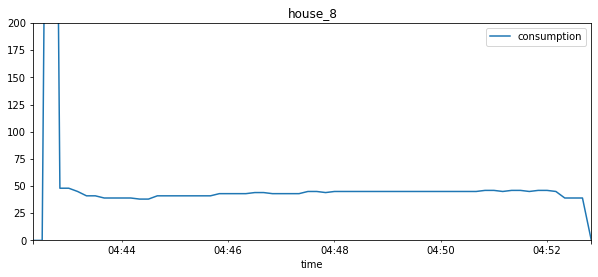

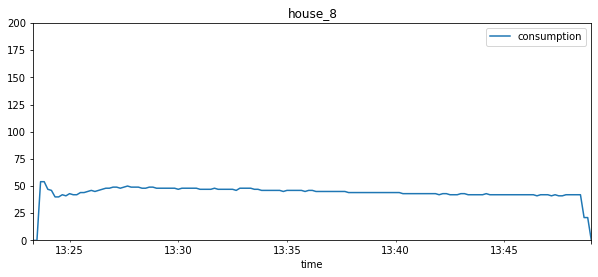

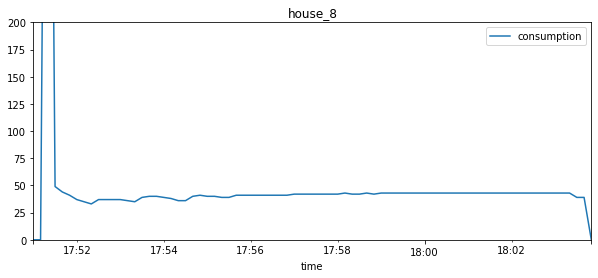

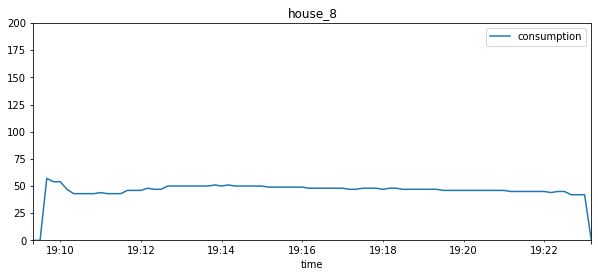

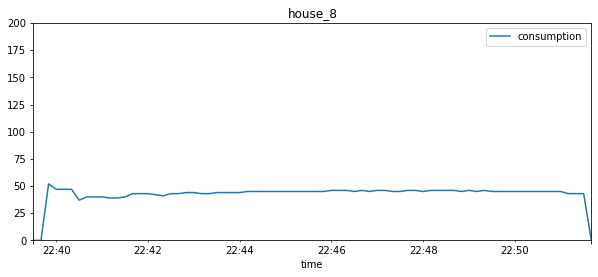

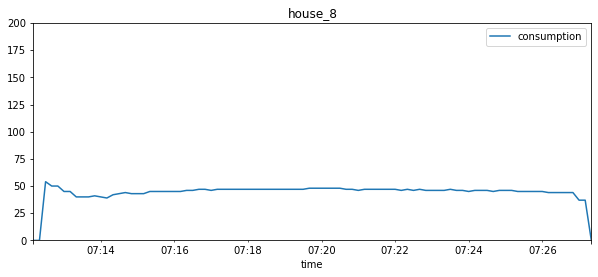

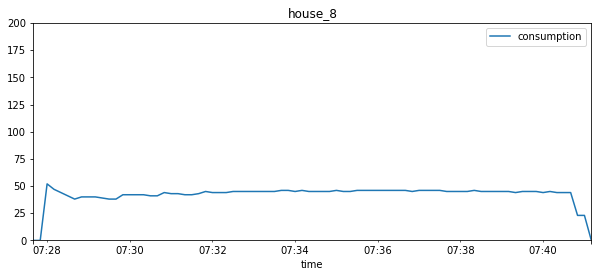

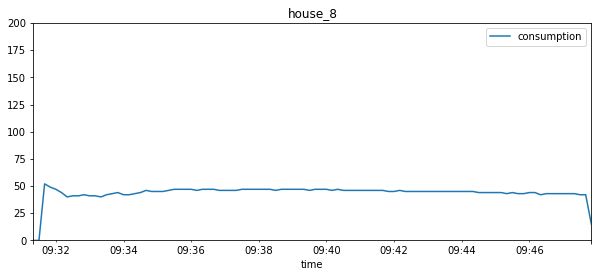

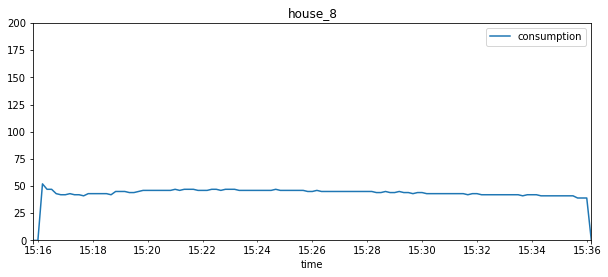

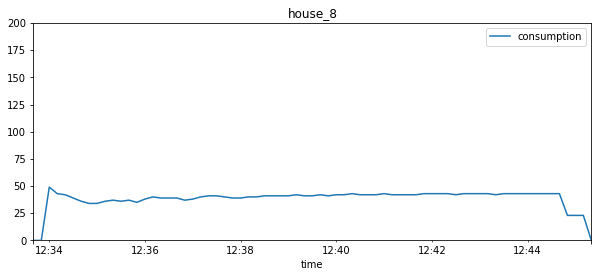

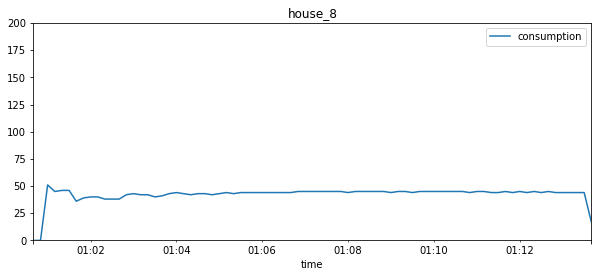

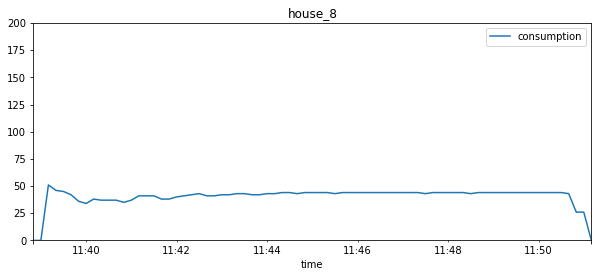

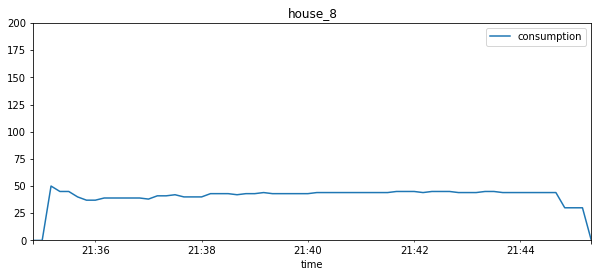

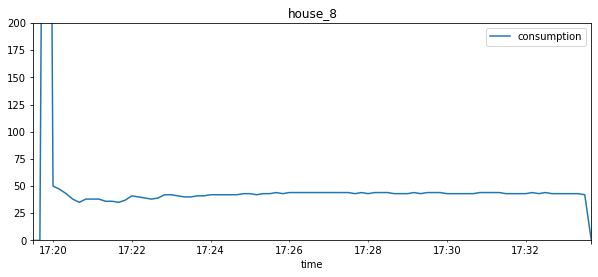

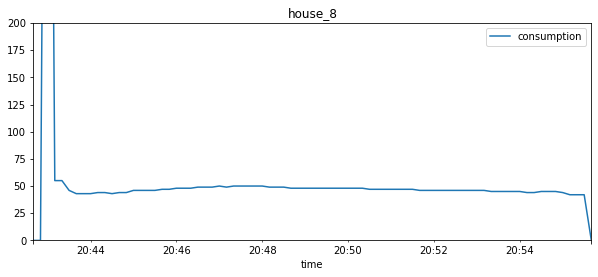

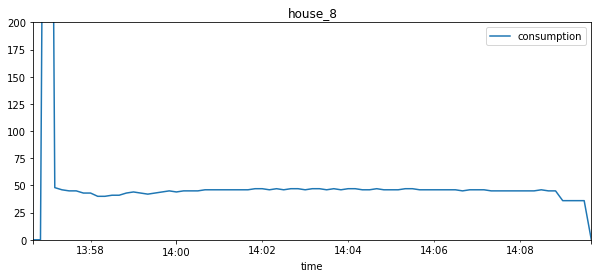

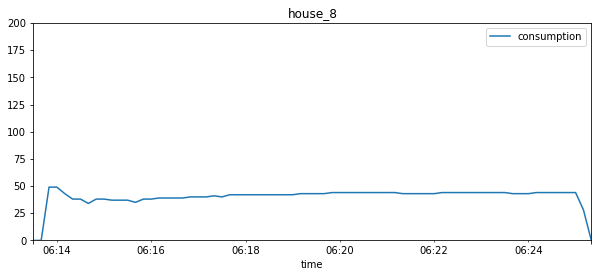

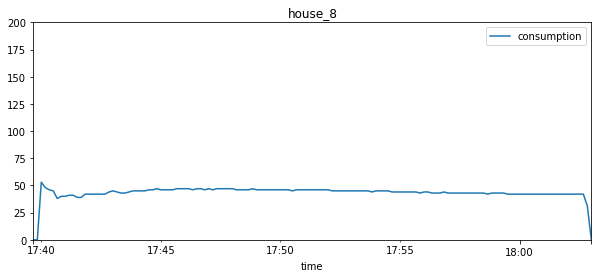

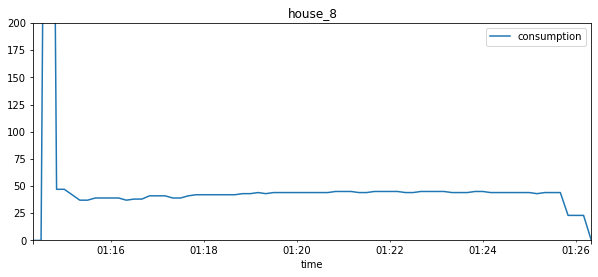

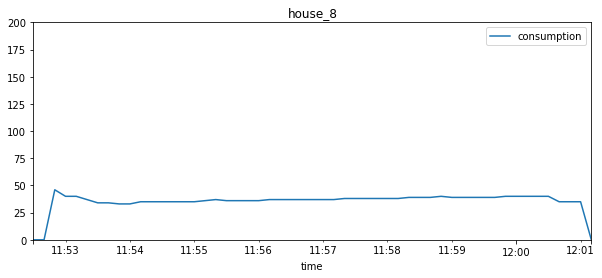

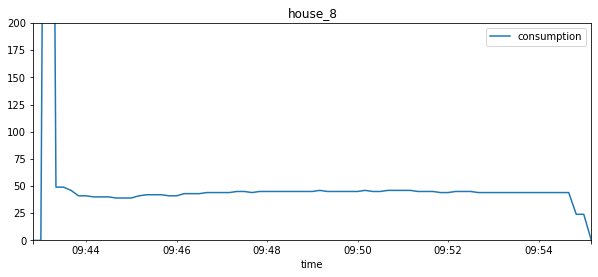

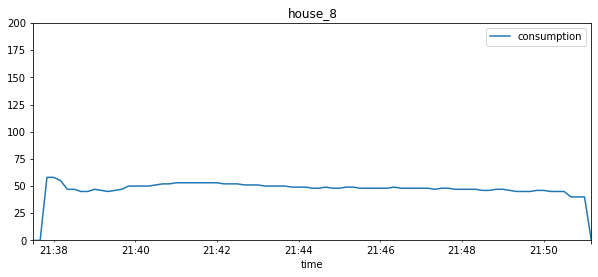

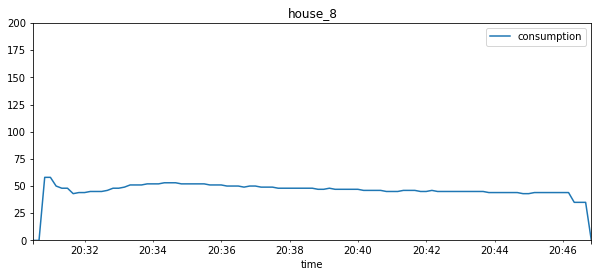

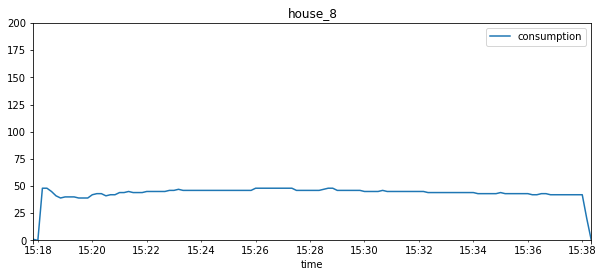

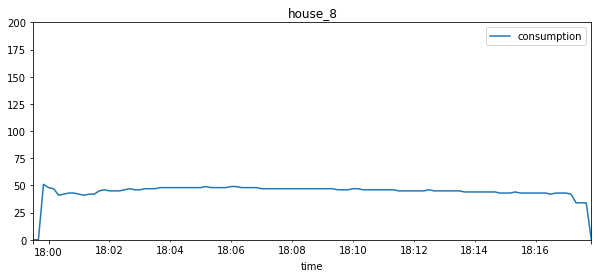

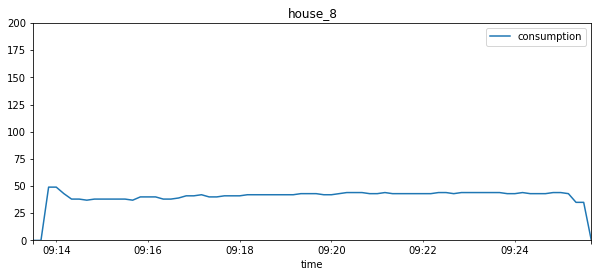

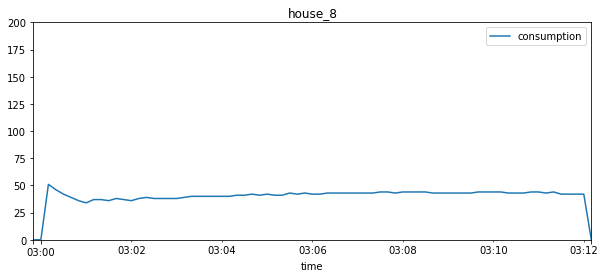

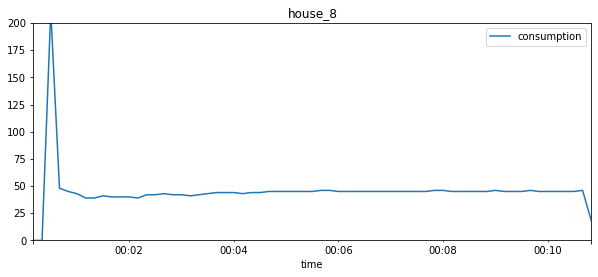

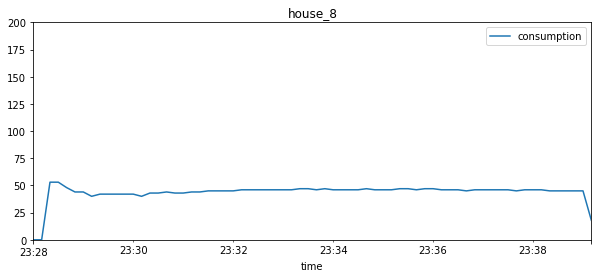

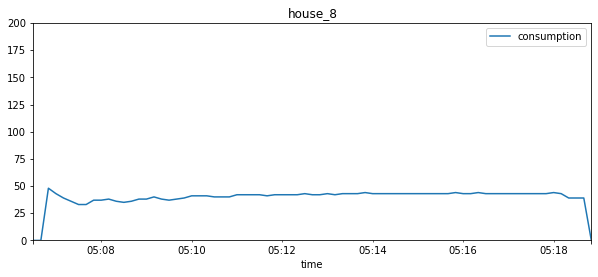

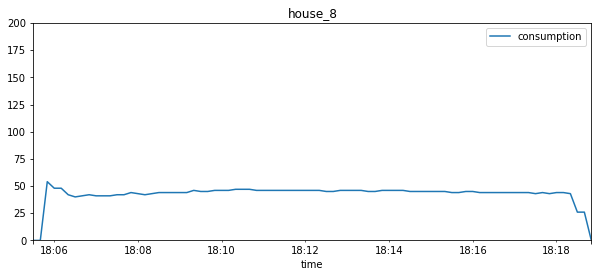

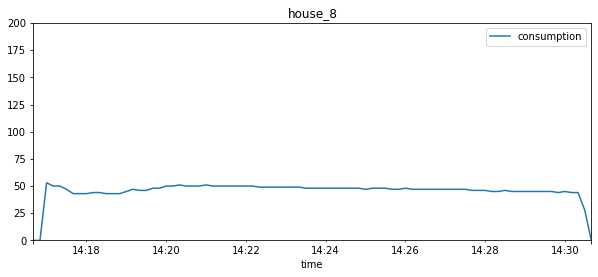

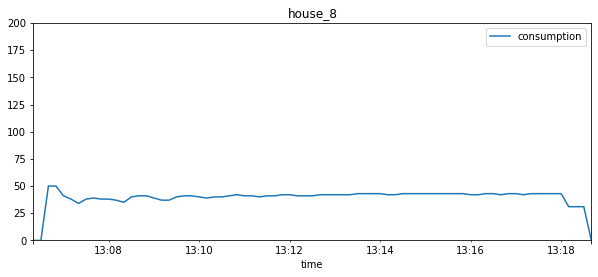

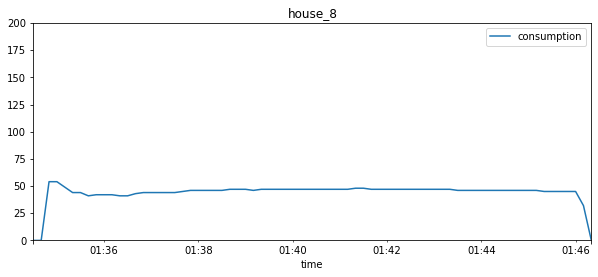

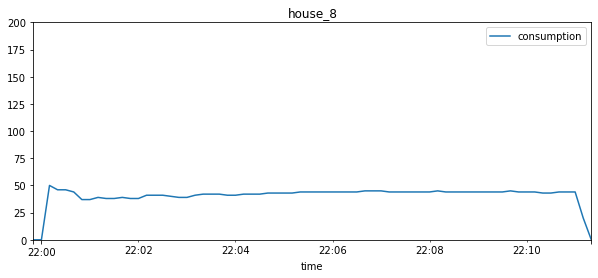

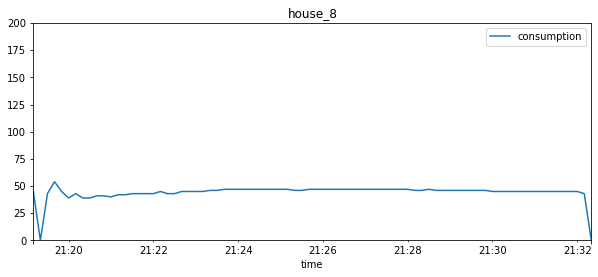

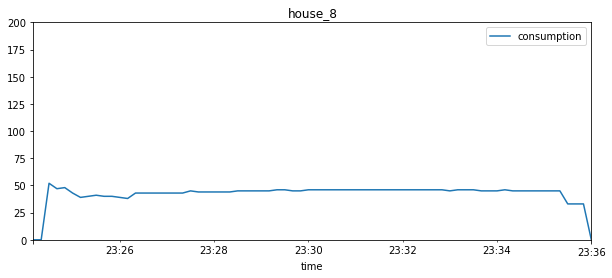

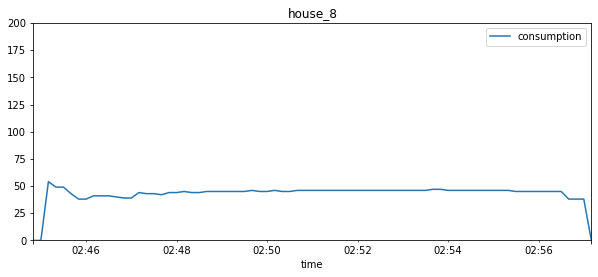

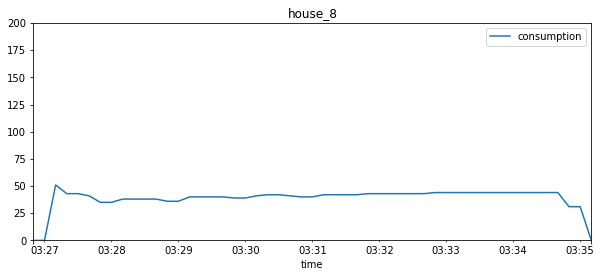

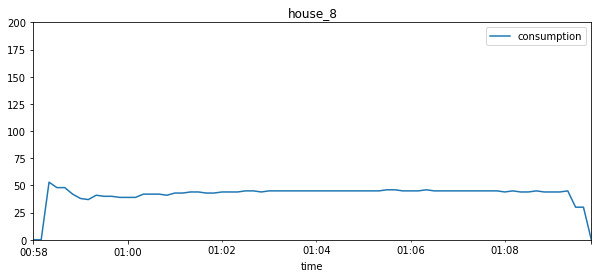

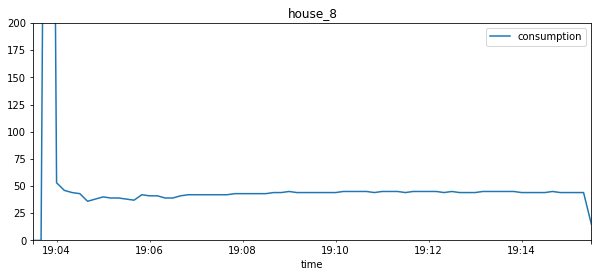

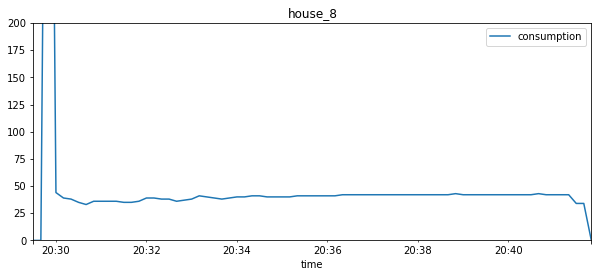

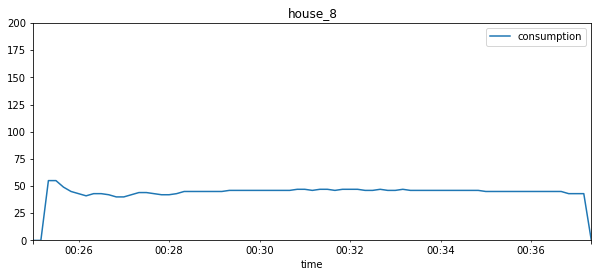

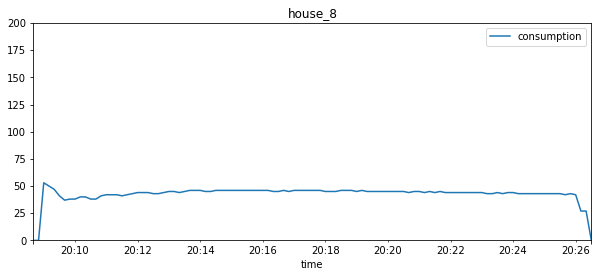

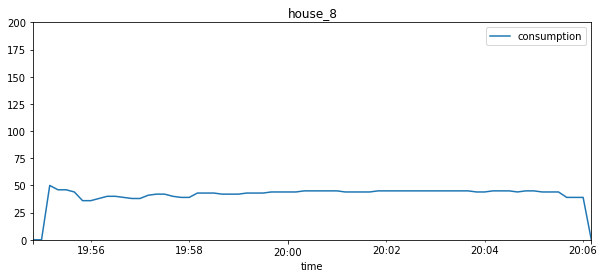

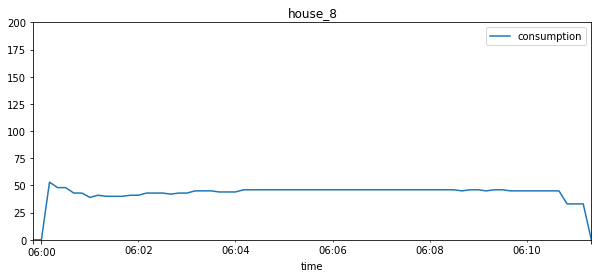

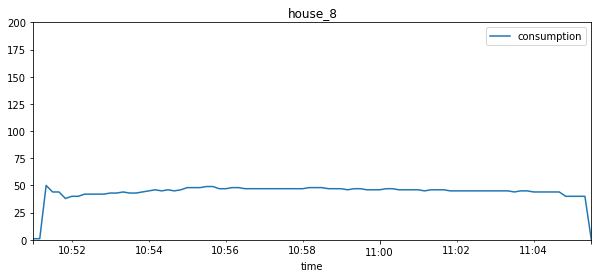

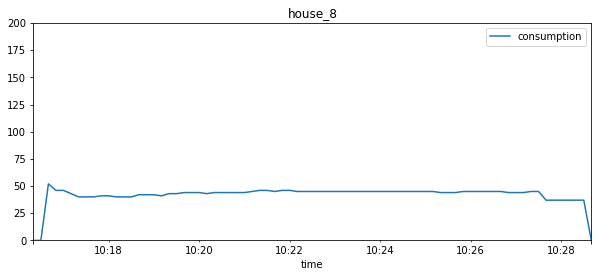

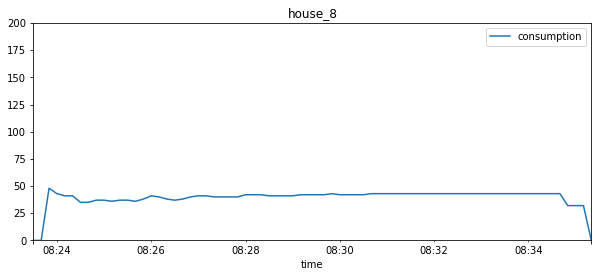

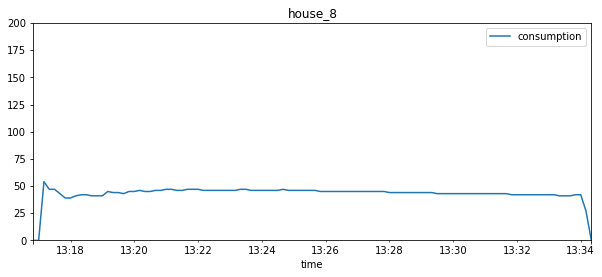

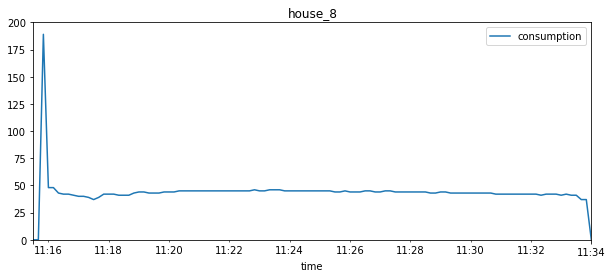

In [23]:
house=8
activations=random.sample(range(0, len(Refit_fridge_activations[house])),100)
df=Refit_fridges[house]
for activation in activations:
    beginning=Refit_fridge_activations[house][activation][0]
    end=Refit_fridge_activations[house][activation][1]
    ax=df.iloc[beginning:end].plot(x="time",y=['consumption'], figsize=(10,4),title="house_"+str(house))
    ax.set_ylim(0,200)

/home/mahdi/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


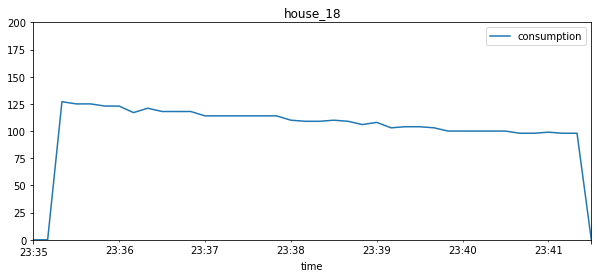

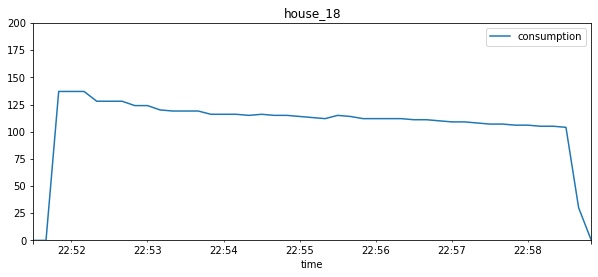

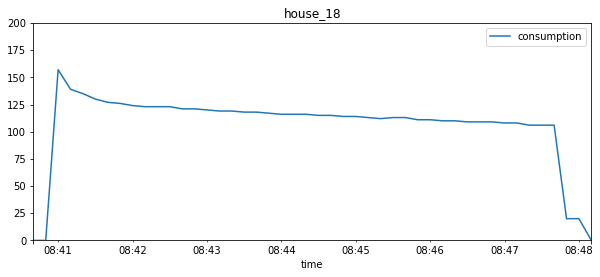

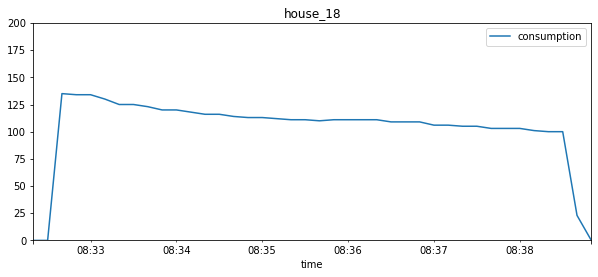

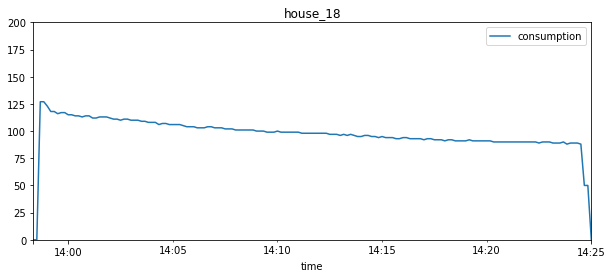

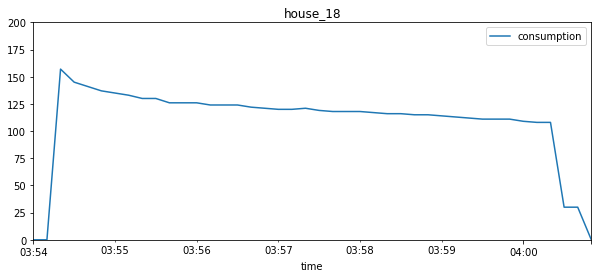

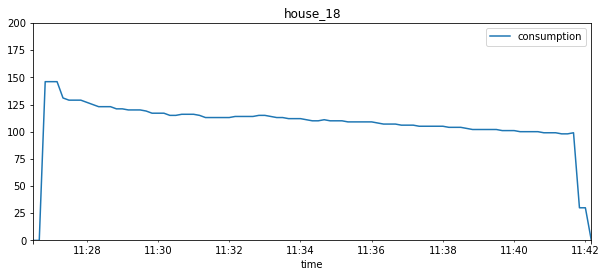

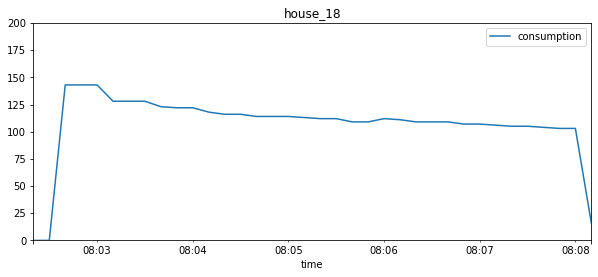

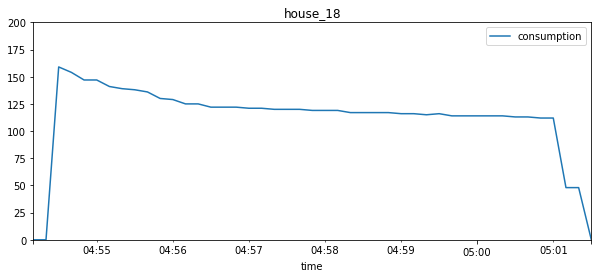

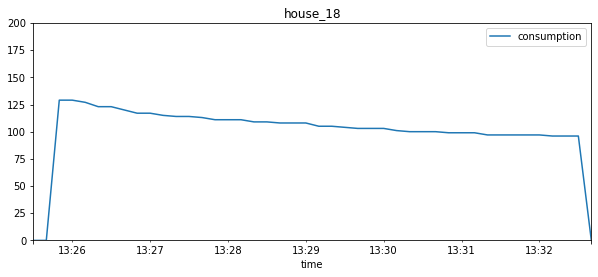

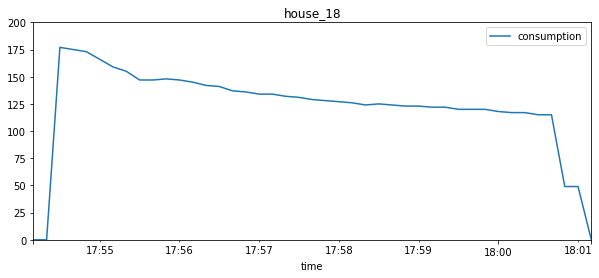

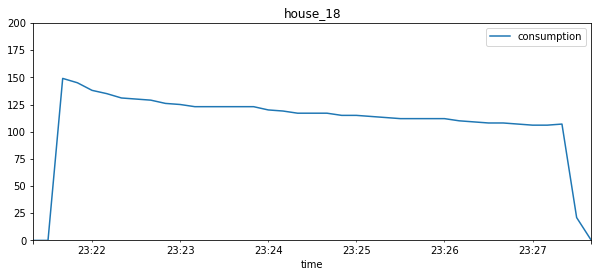

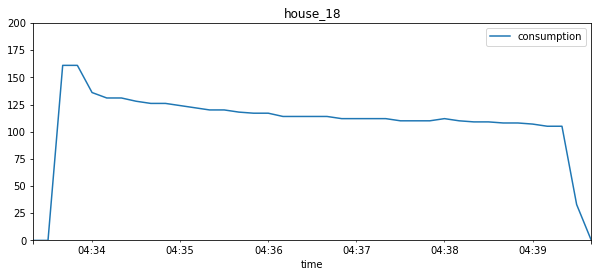

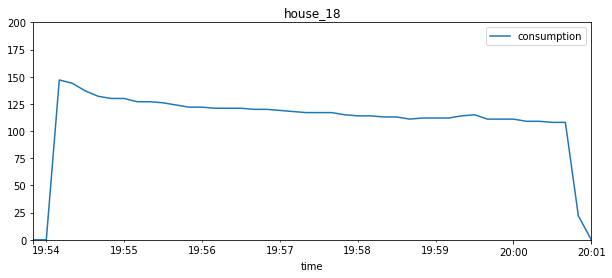

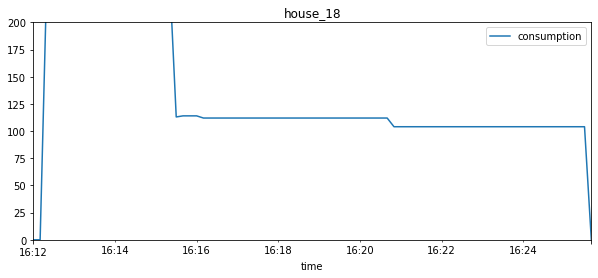

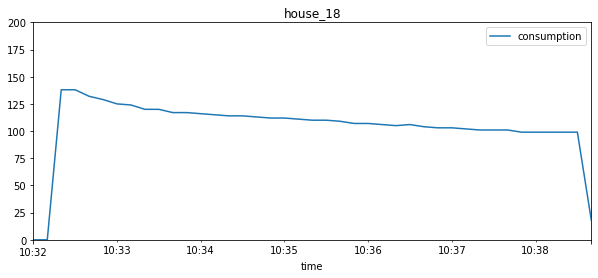

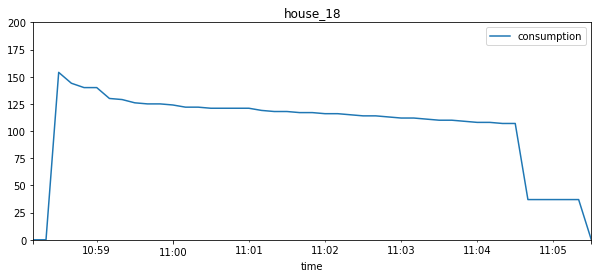

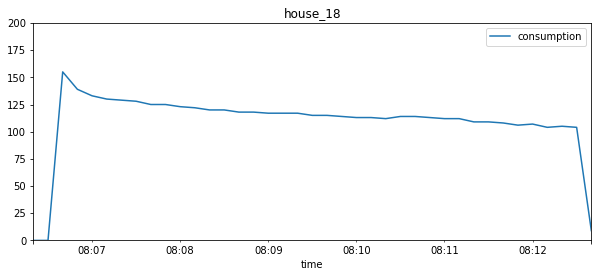

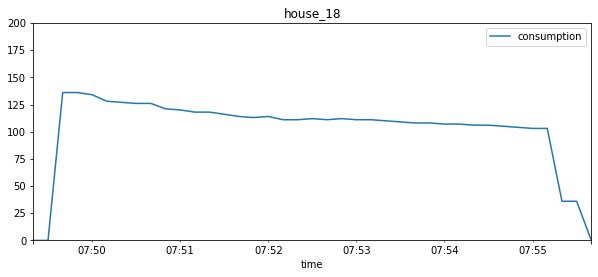

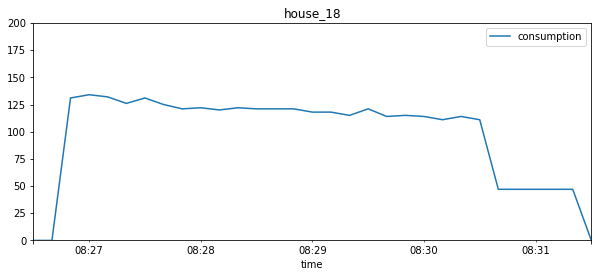

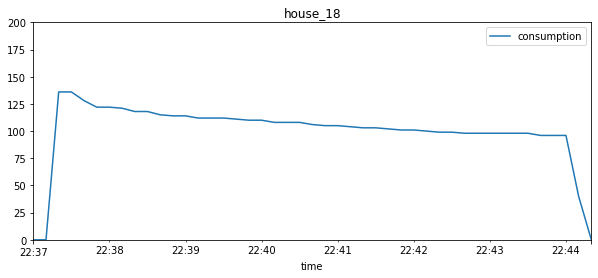

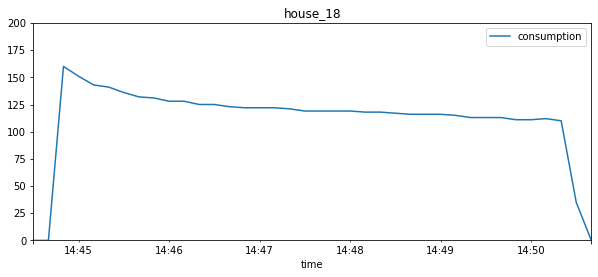

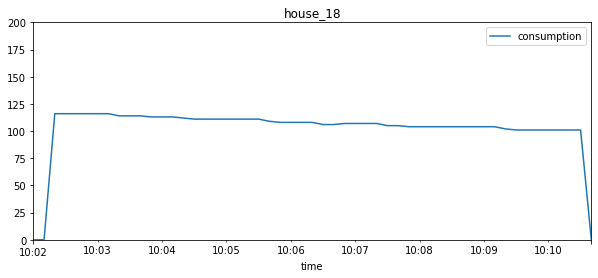

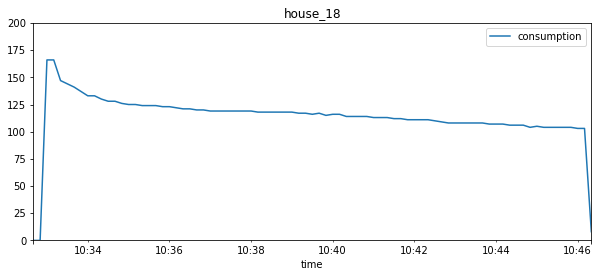

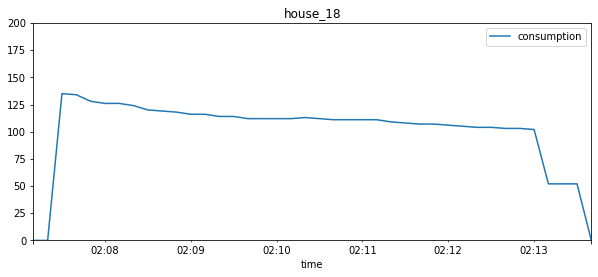

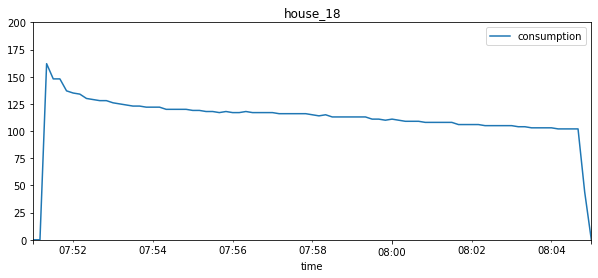

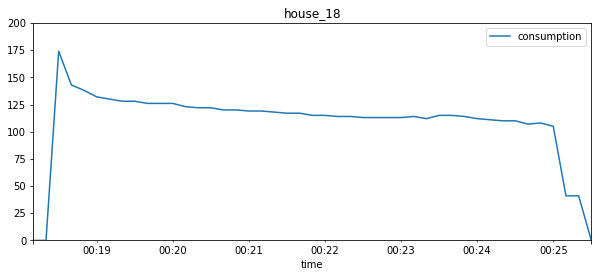

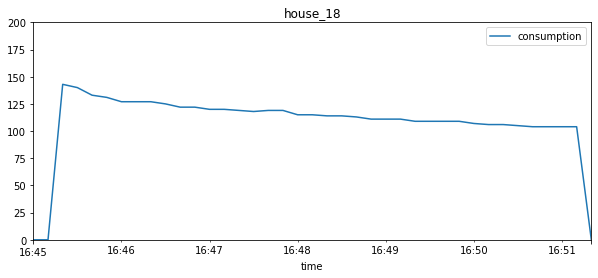

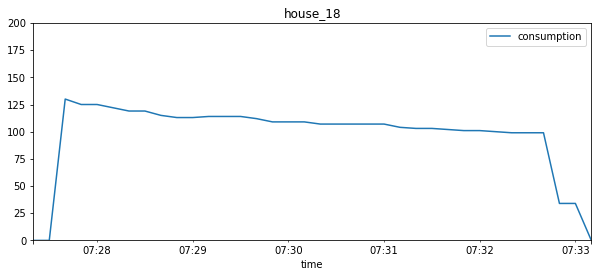

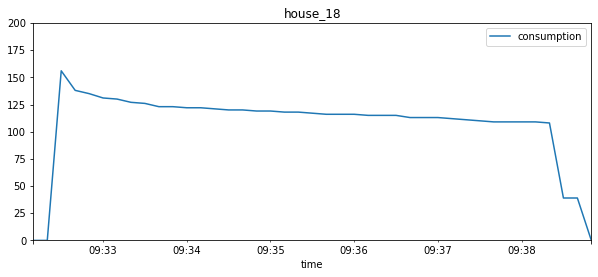

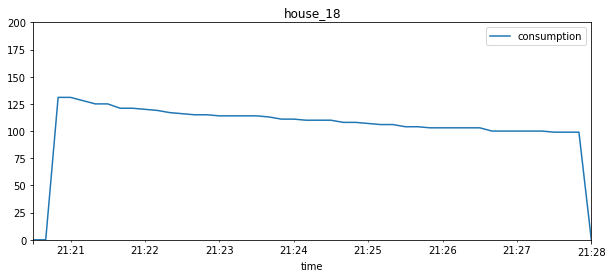

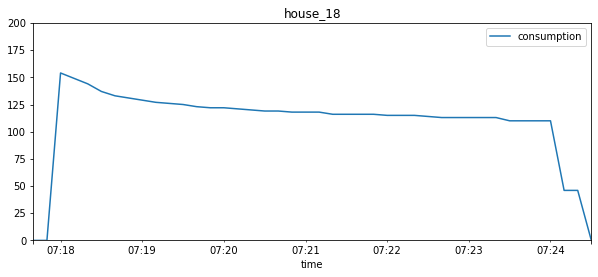

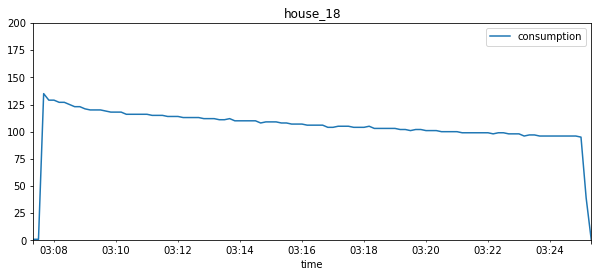

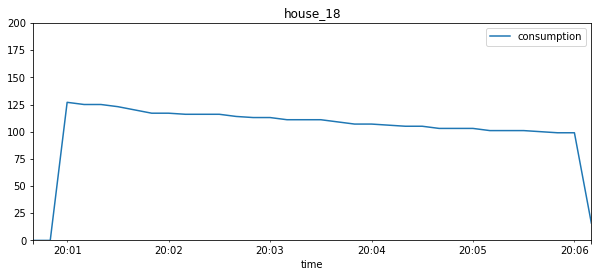

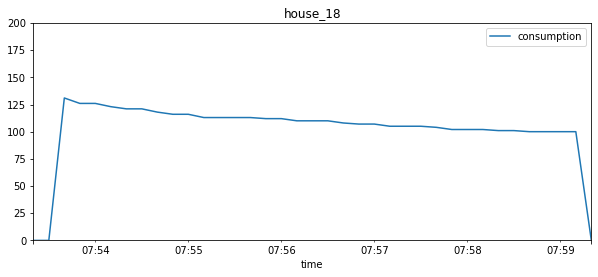

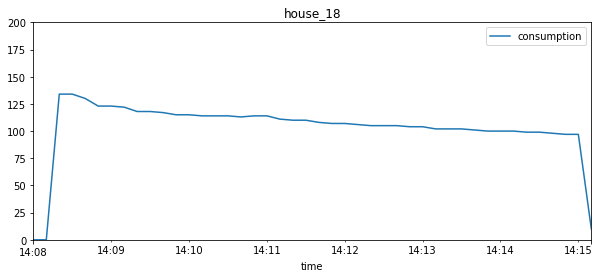

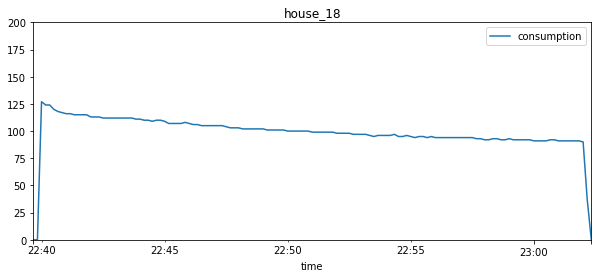

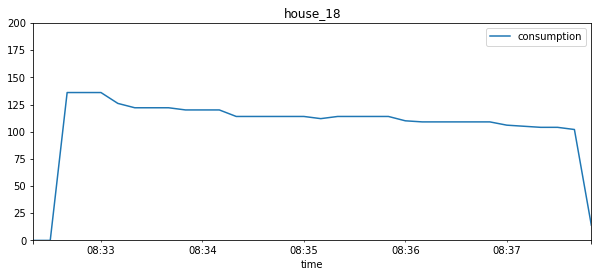

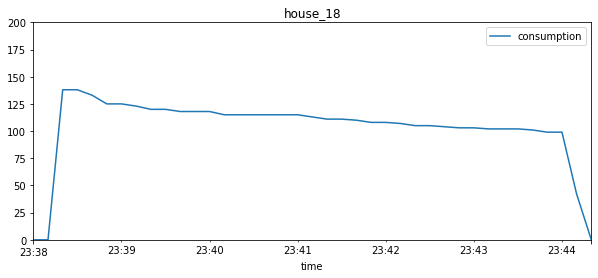

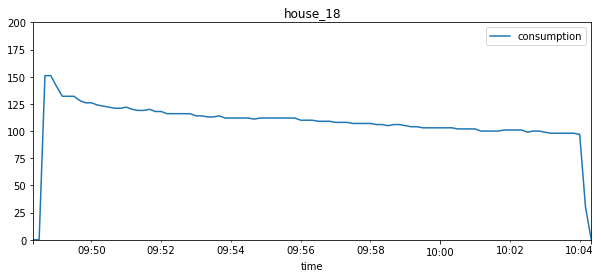

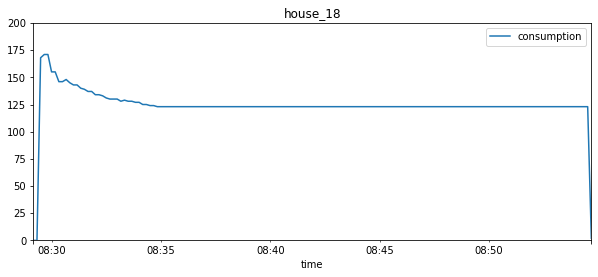

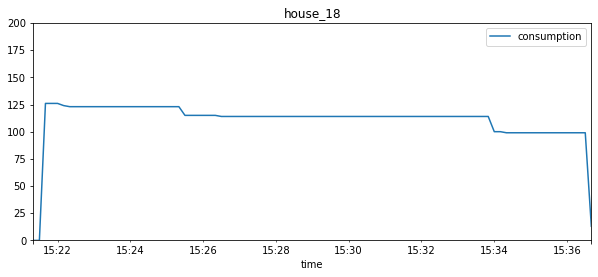

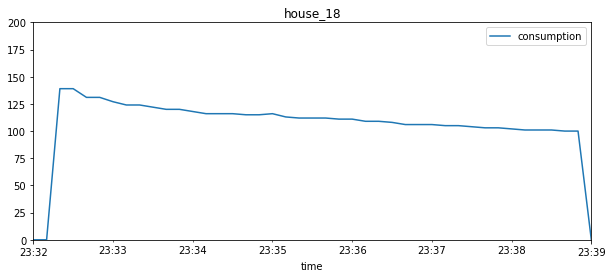

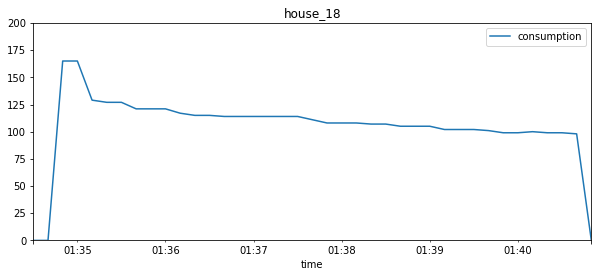

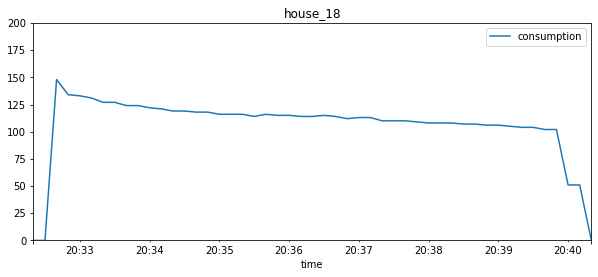

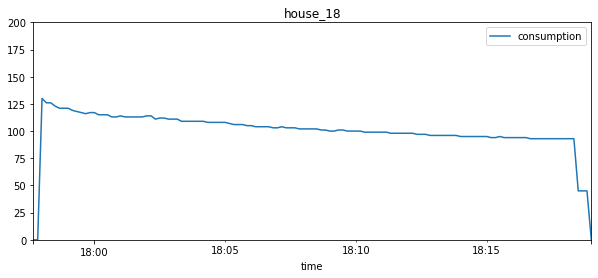

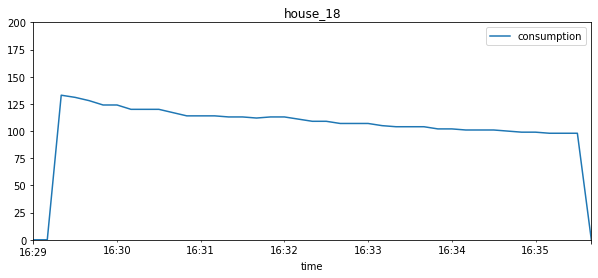

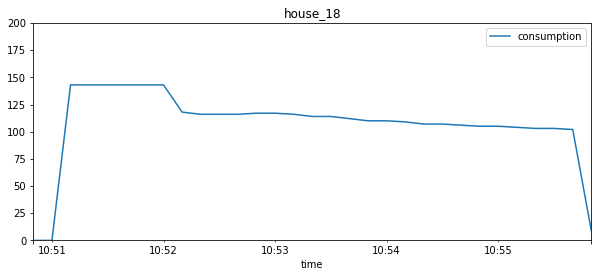

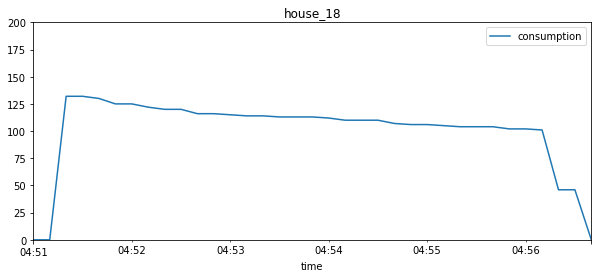

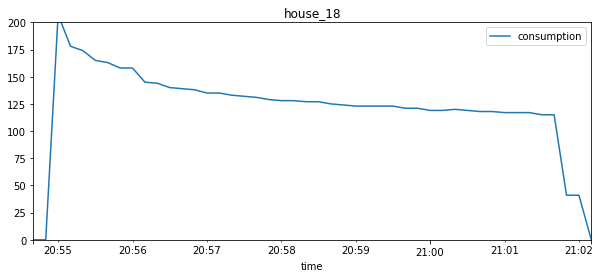

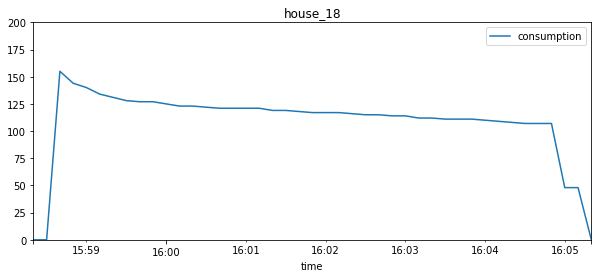

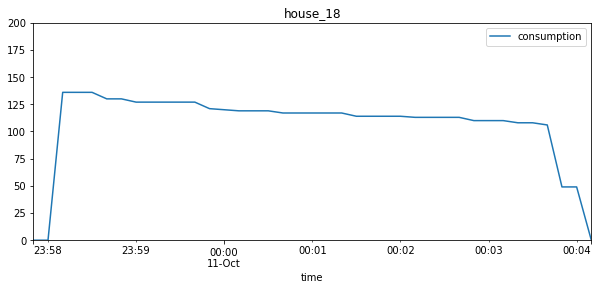

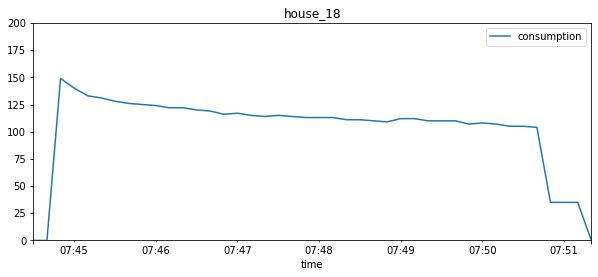

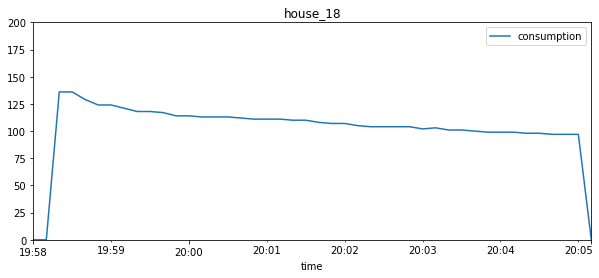

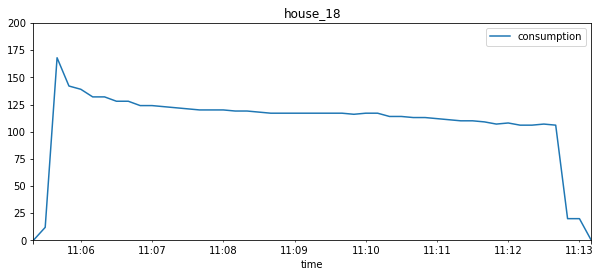

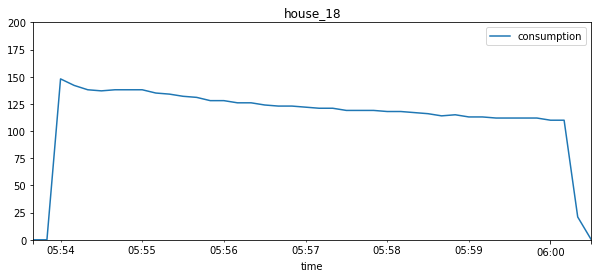

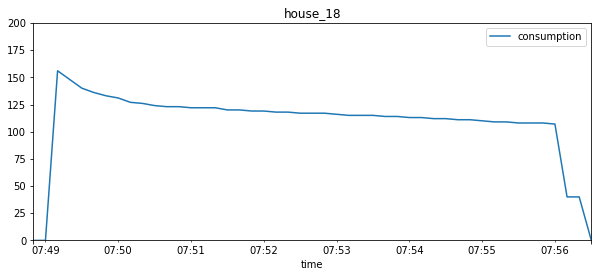

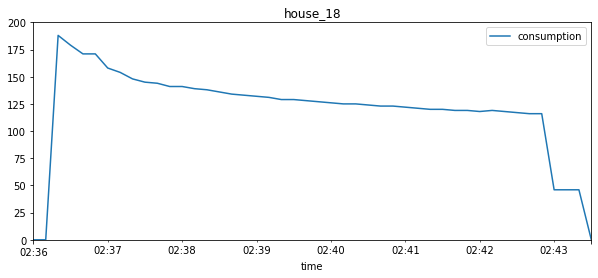

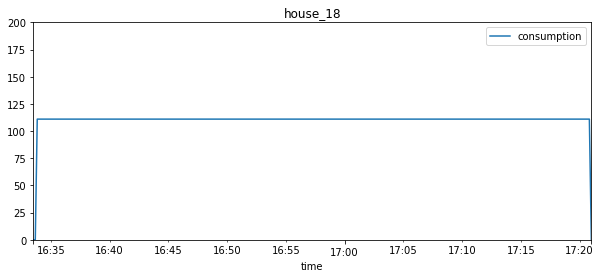

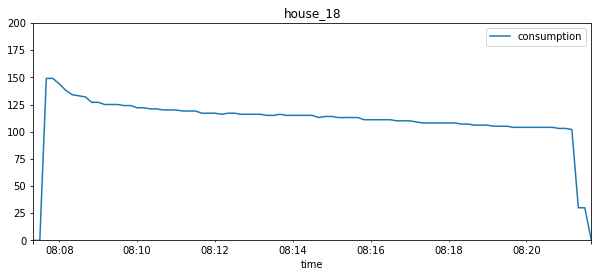

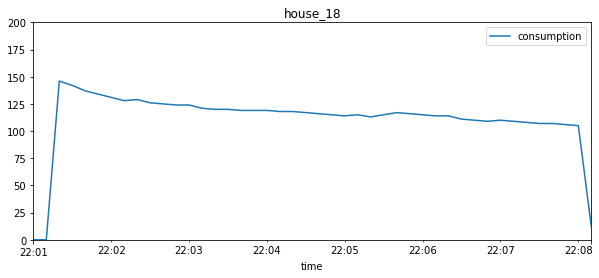

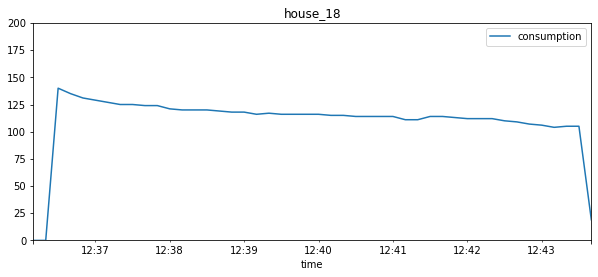

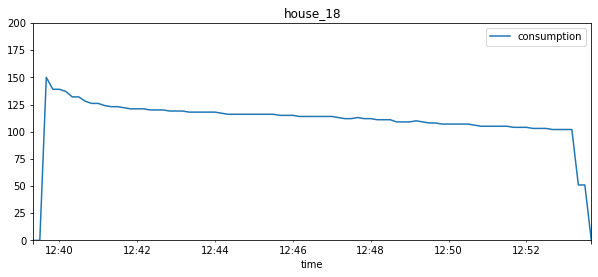

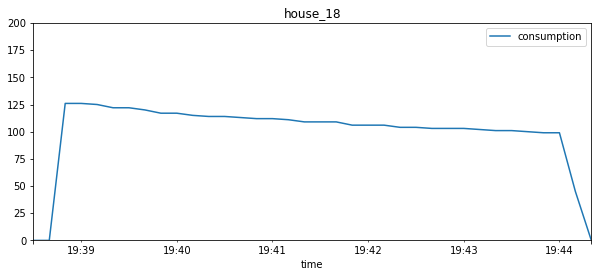

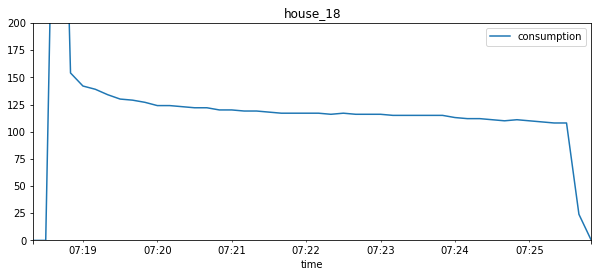

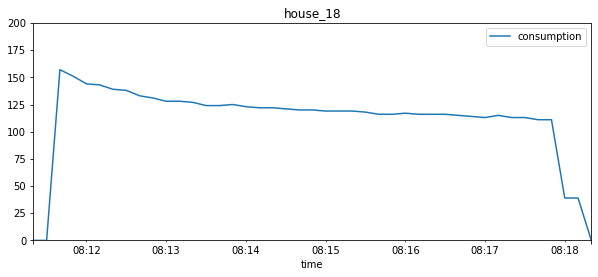

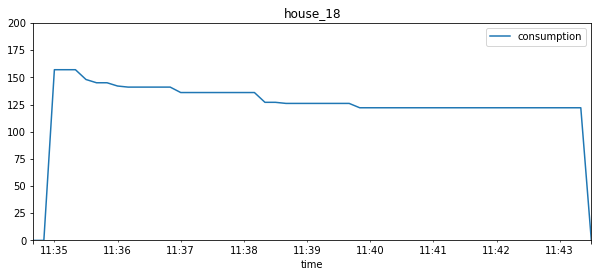

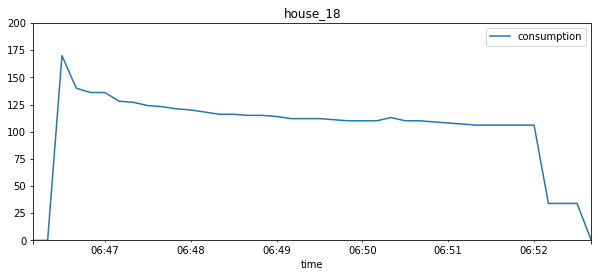

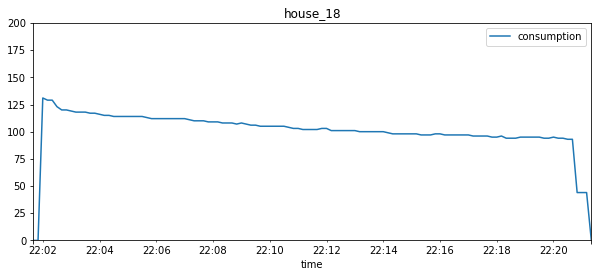

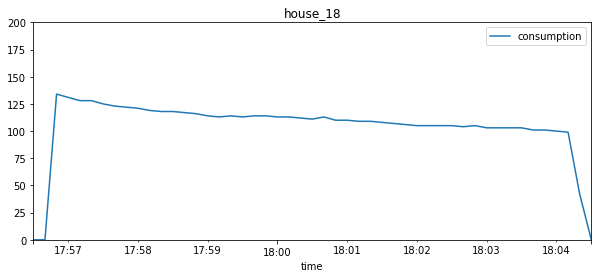

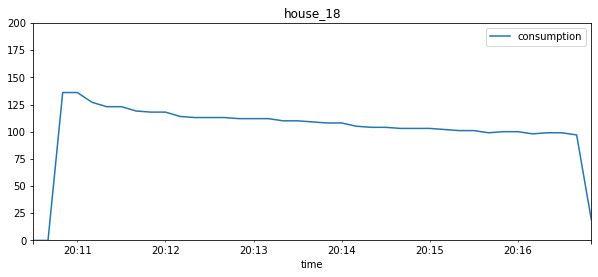

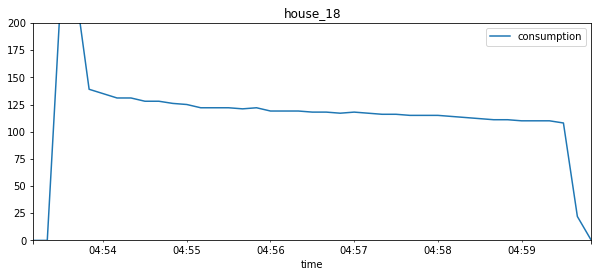

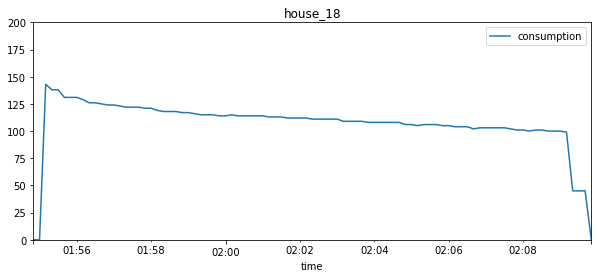

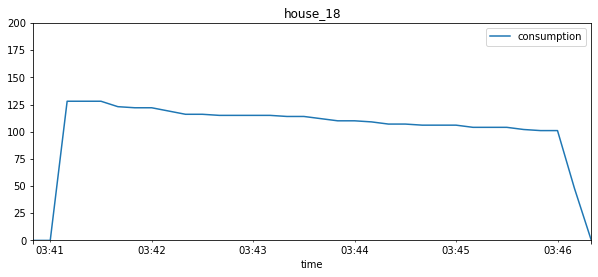

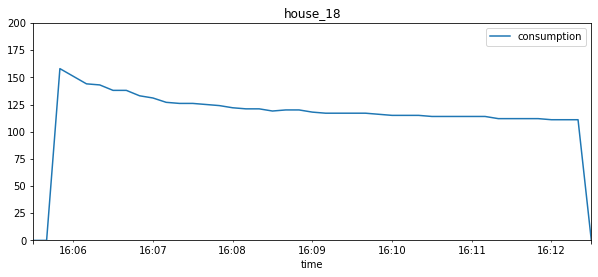

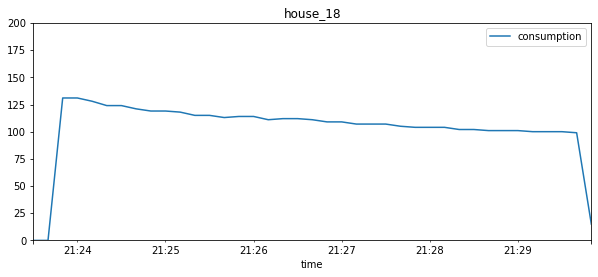

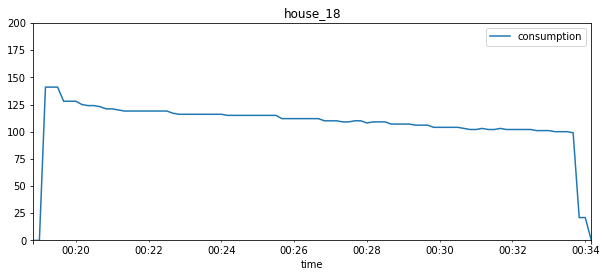

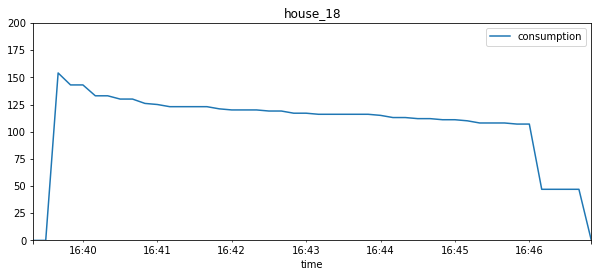

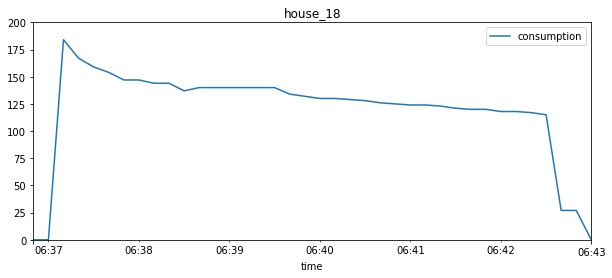

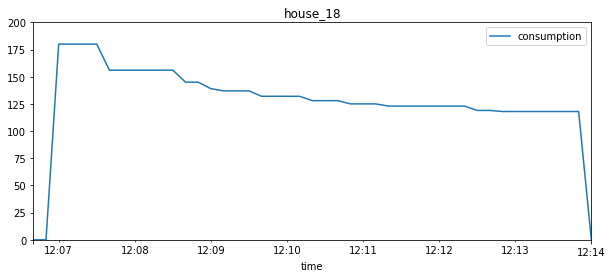

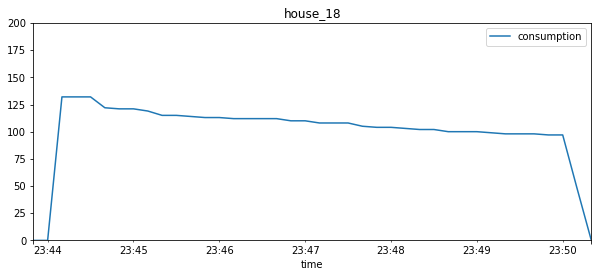

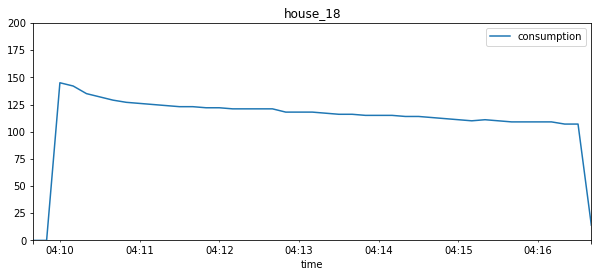

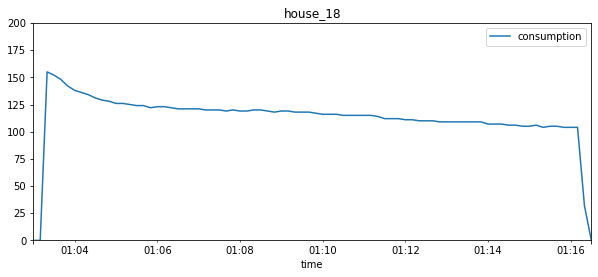

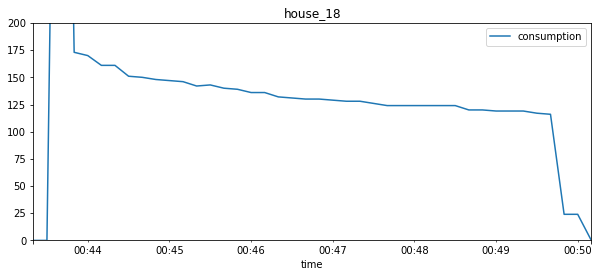

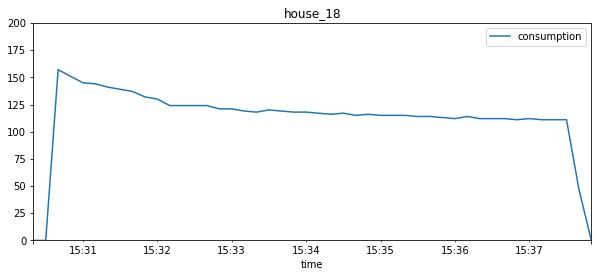

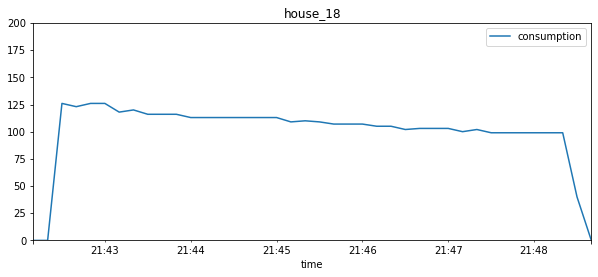

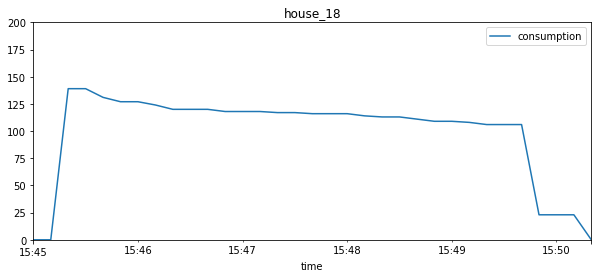

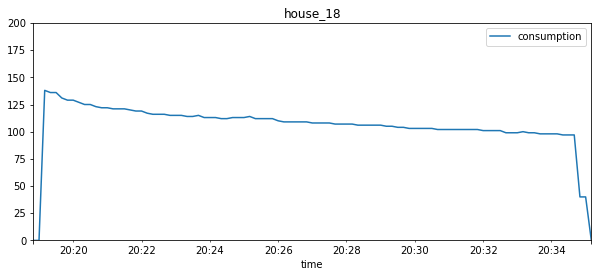

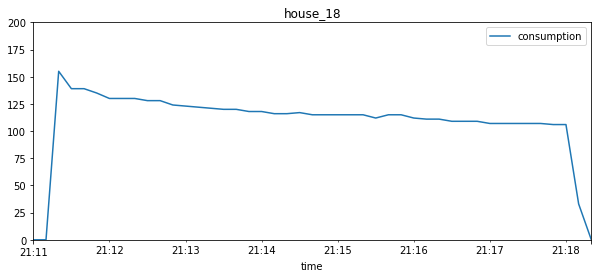

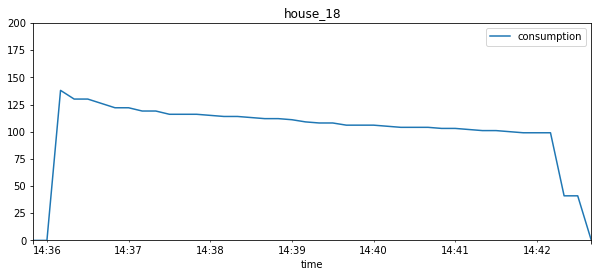

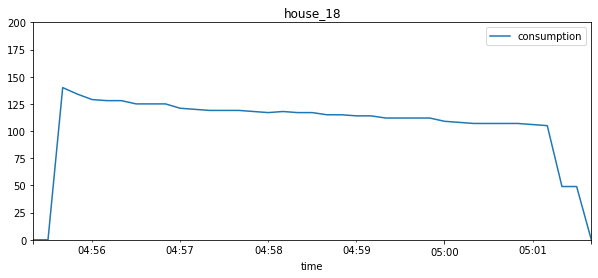

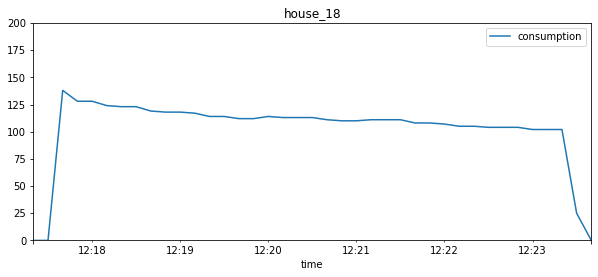

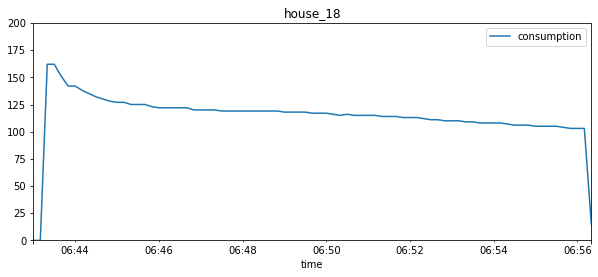

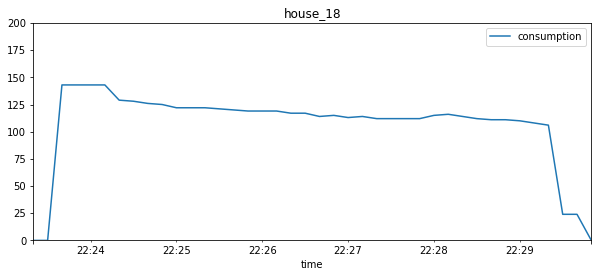

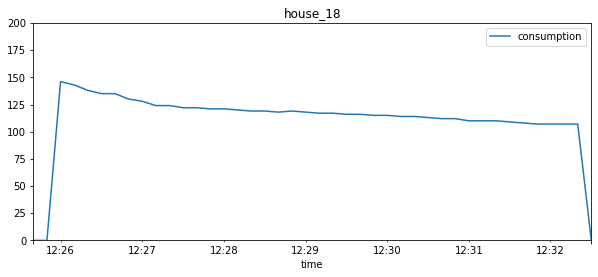

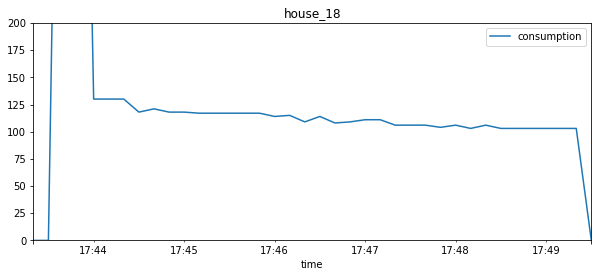

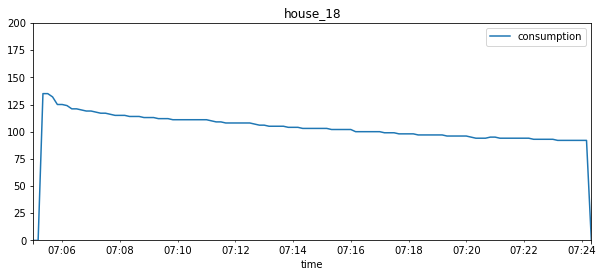

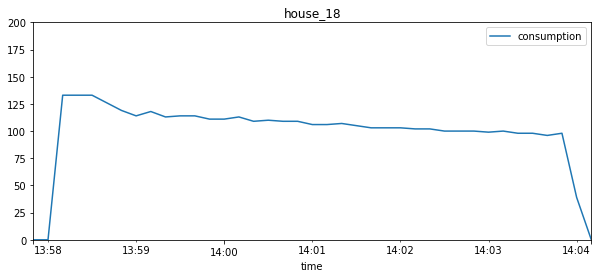

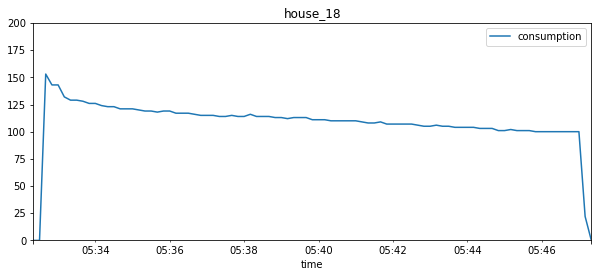

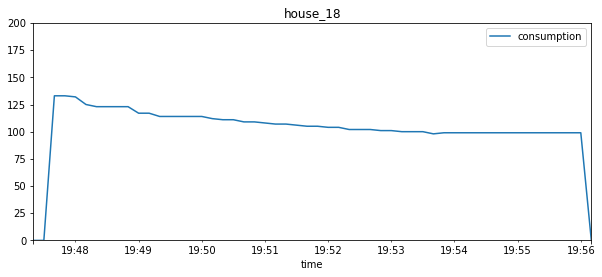

In [24]:
house=18
activations=random.sample(range(0, len(Refit_fridge_activations[house])),100)
df=Refit_fridges[house]
for activation in activations:
    beginning=Refit_fridge_activations[house][activation][0]
    end=Refit_fridge_activations[house][activation][1]
    ax=df.iloc[beginning:end].plot(x="time",y=['consumption'], figsize=(10,4),title="house_"+str(house))
    ax.set_ylim(0,200)

/home/mahdi/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


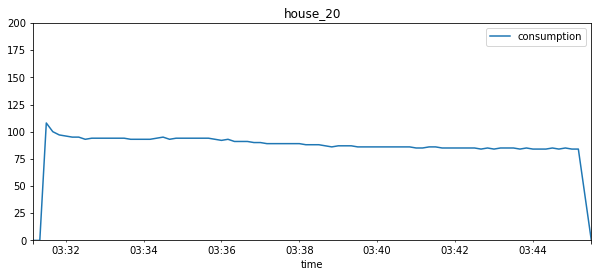

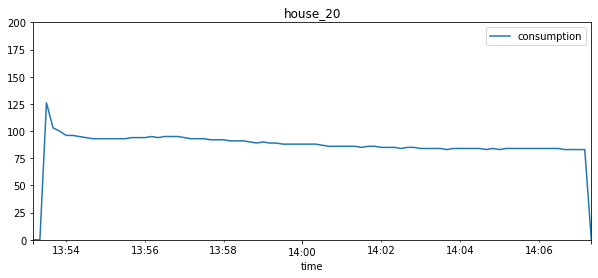

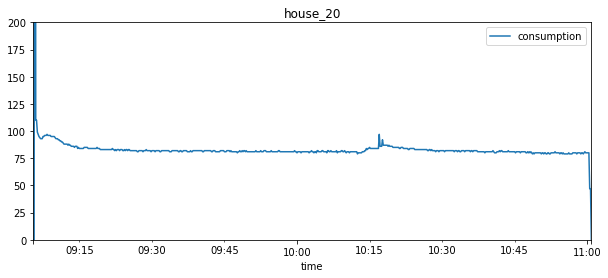

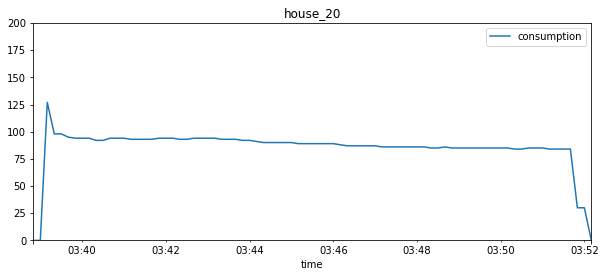

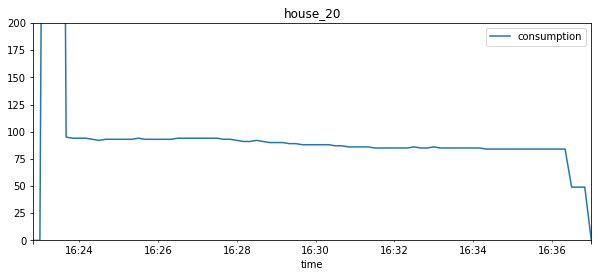

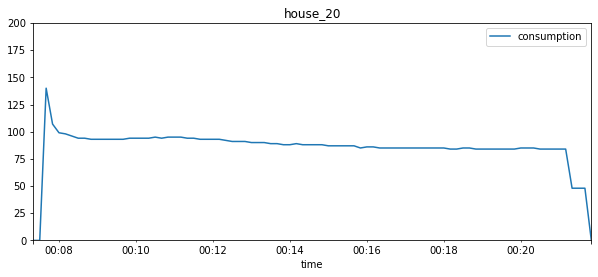

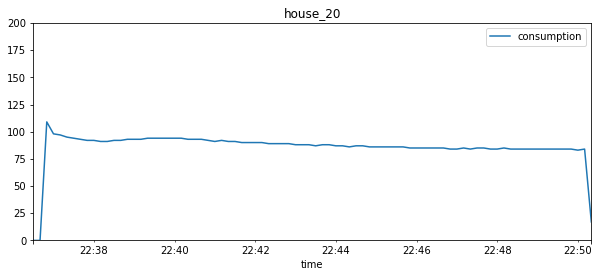

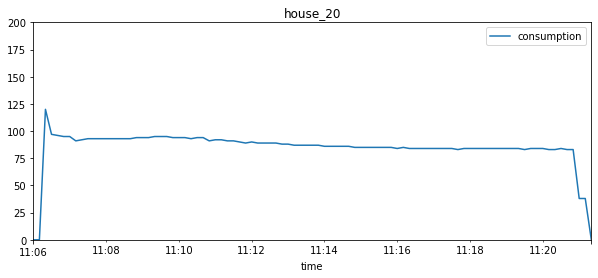

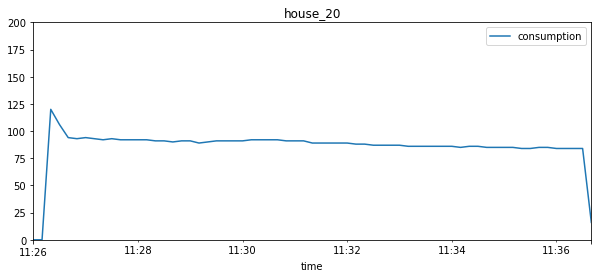

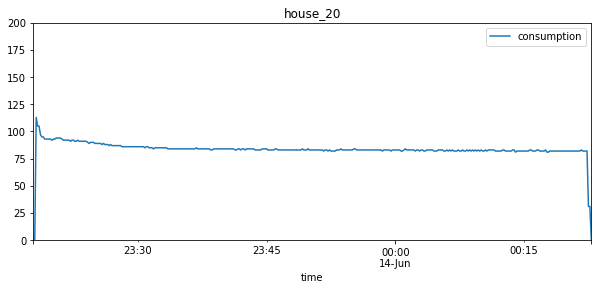

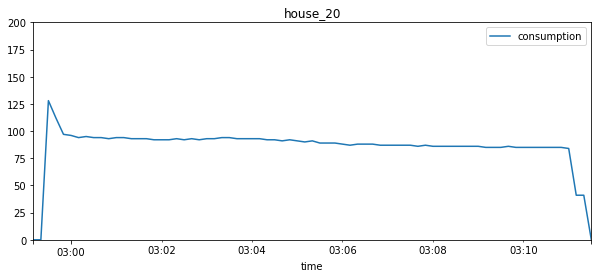

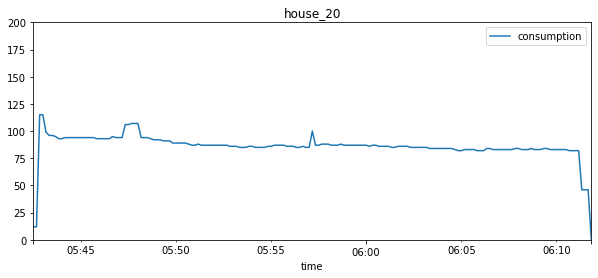

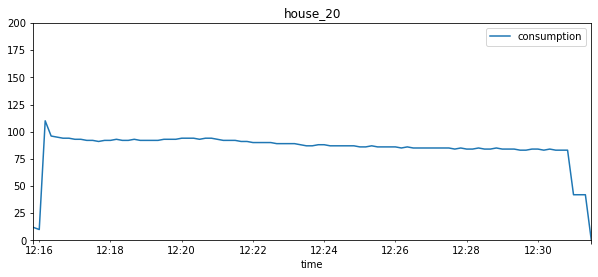

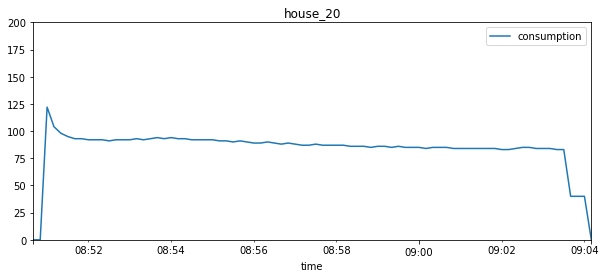

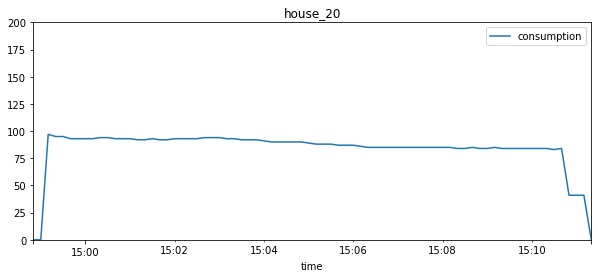

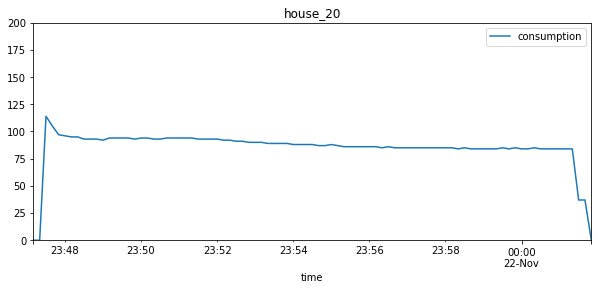

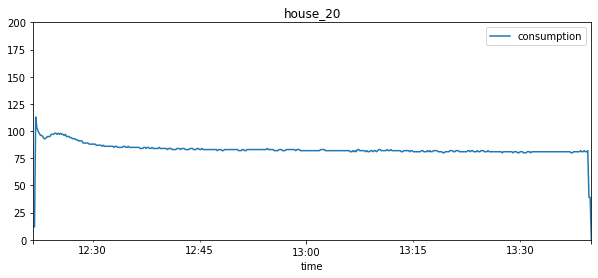

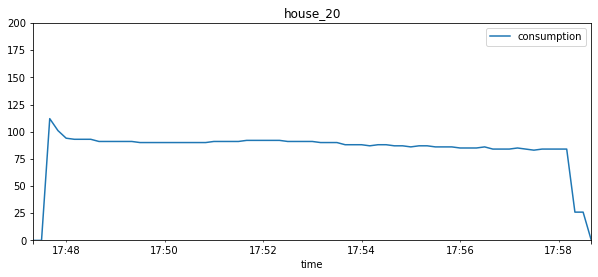

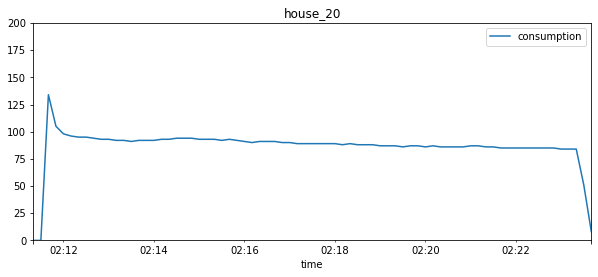

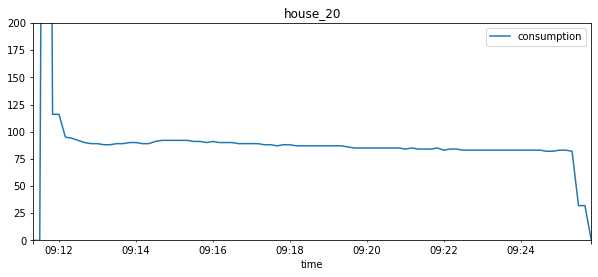

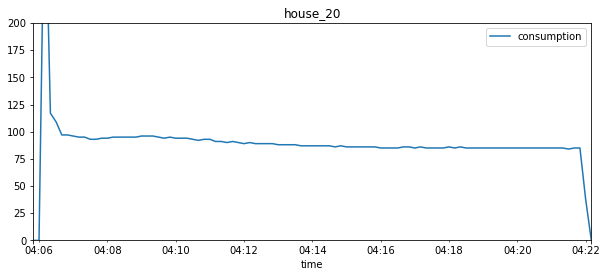

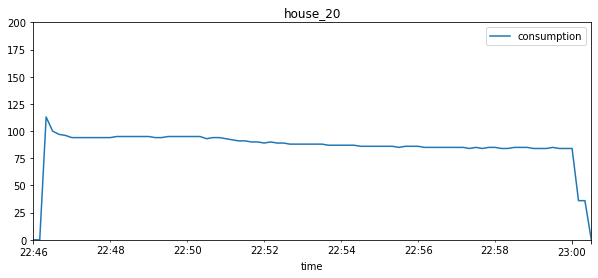

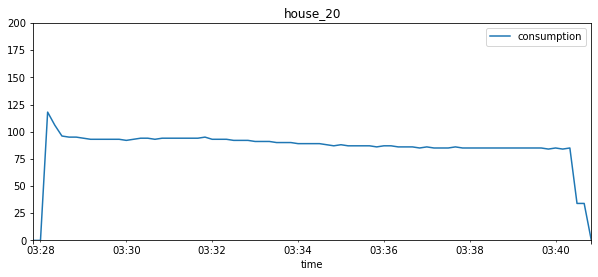

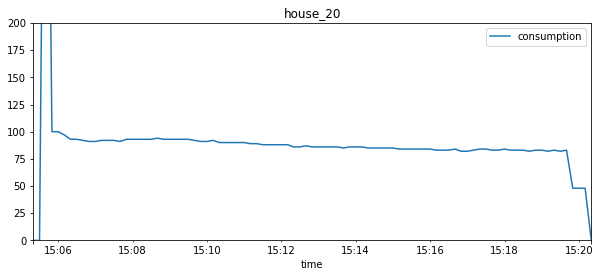

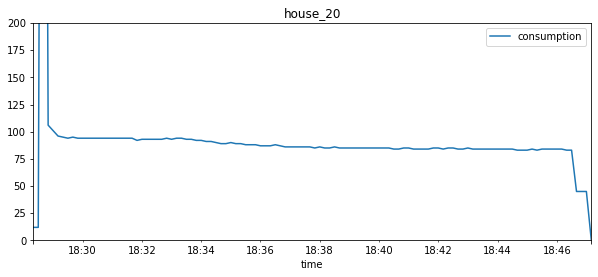

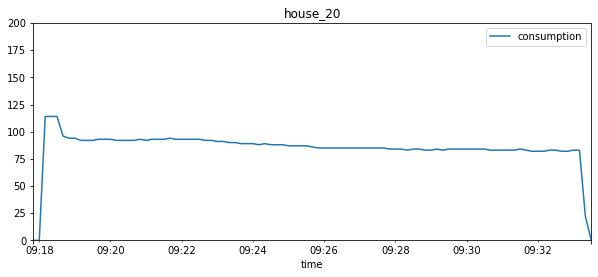

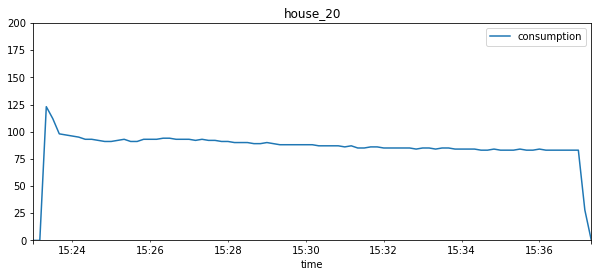

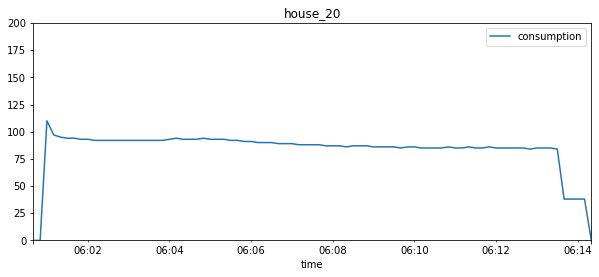

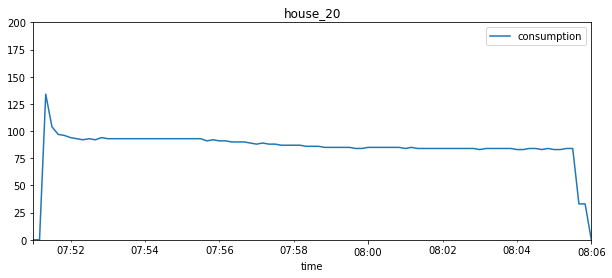

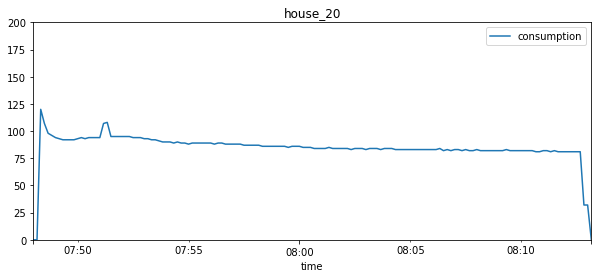

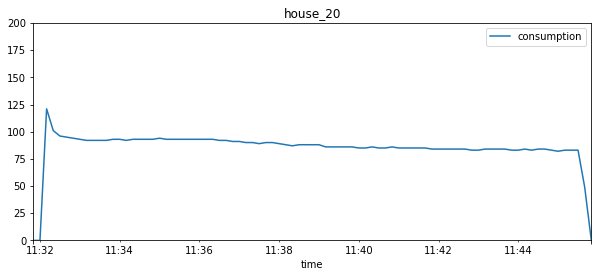

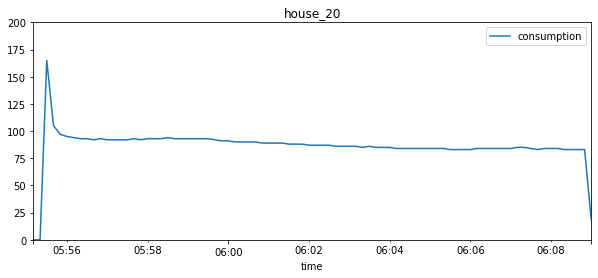

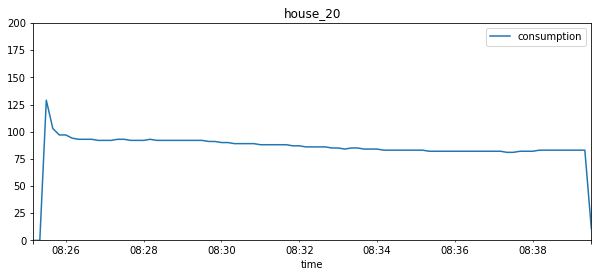

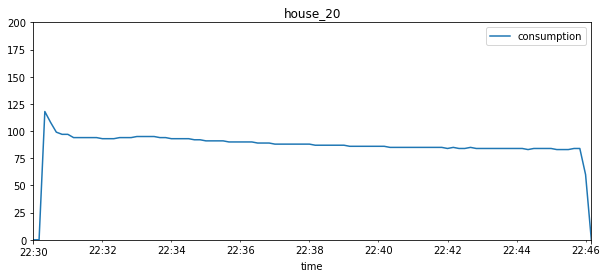

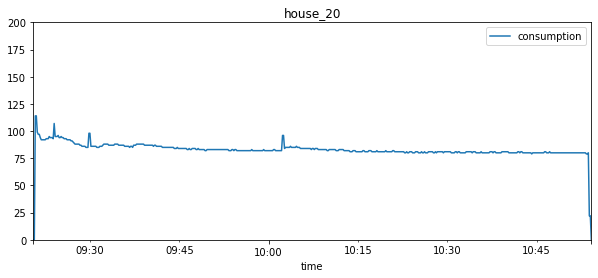

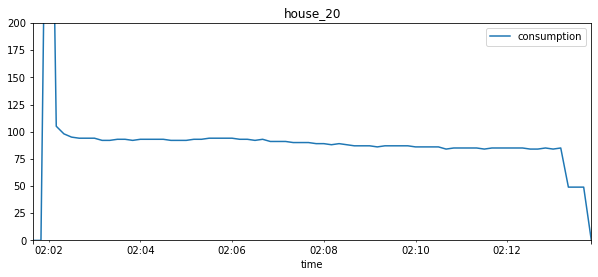

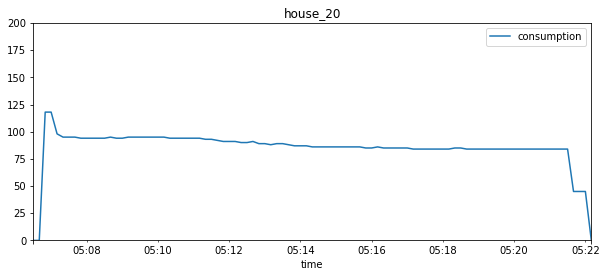

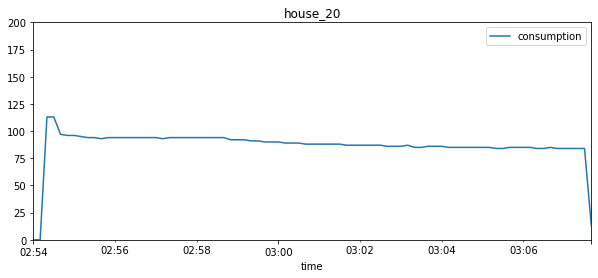

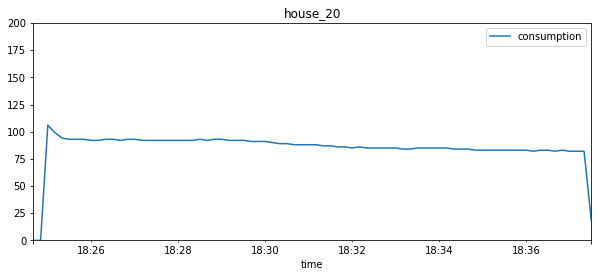

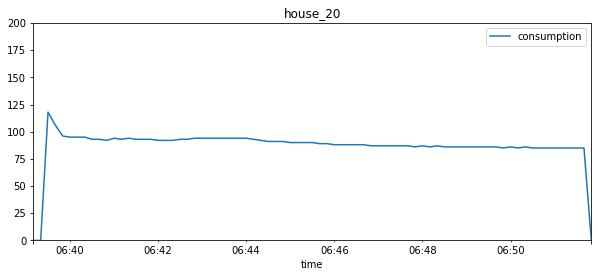

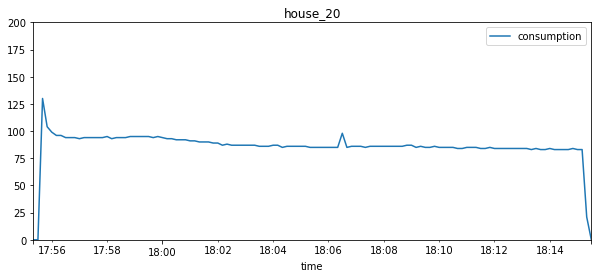

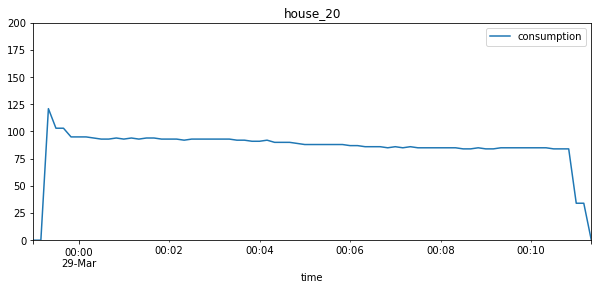

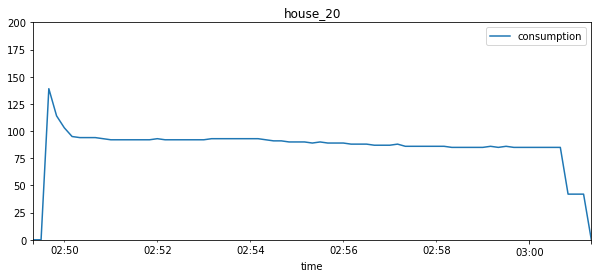

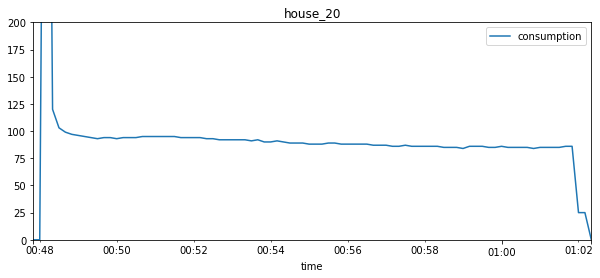

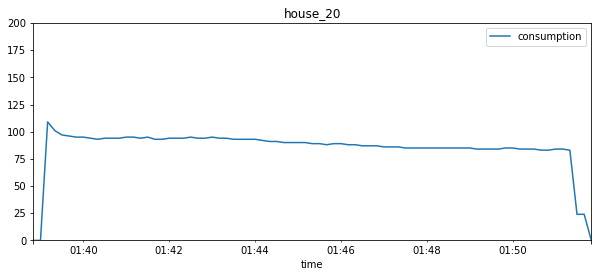

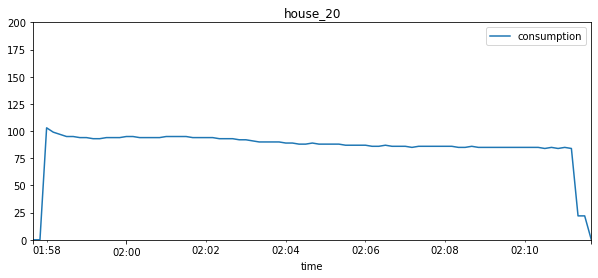

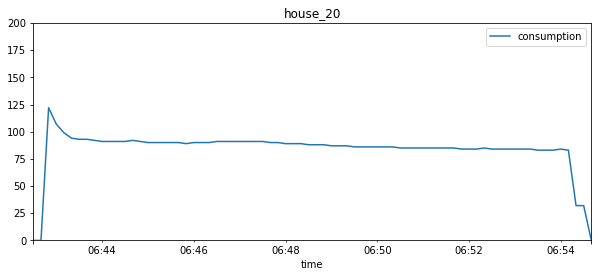

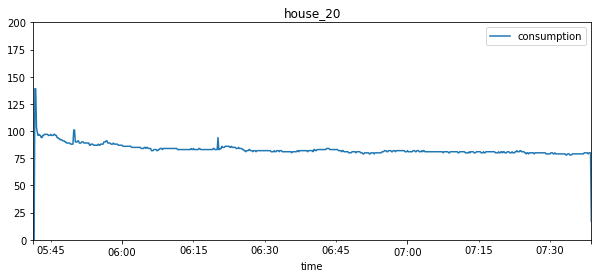

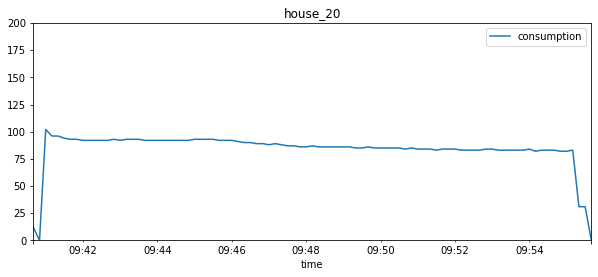

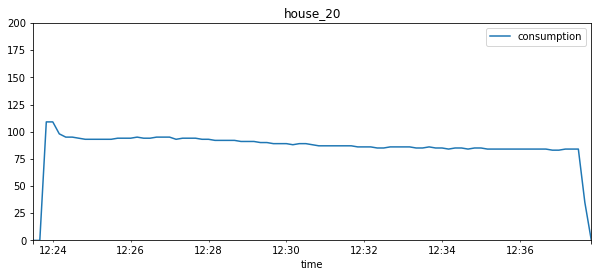

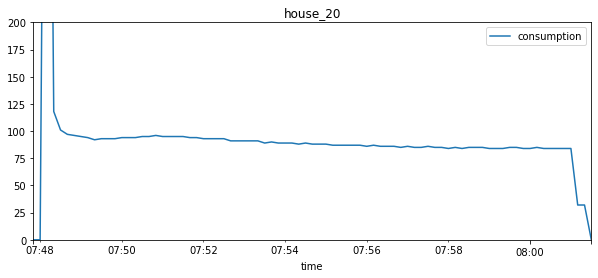

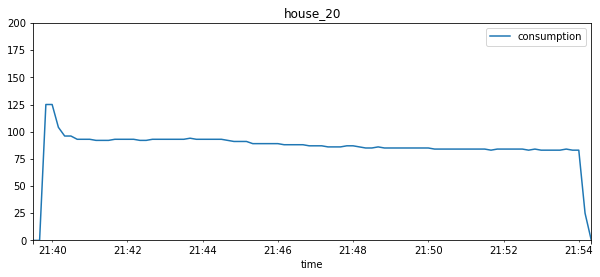

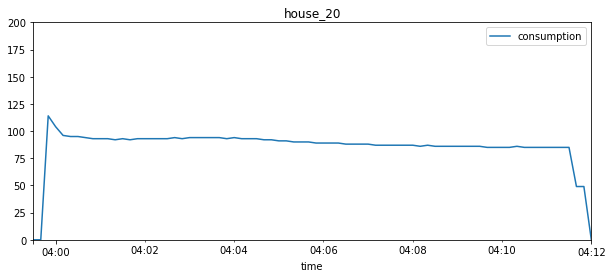

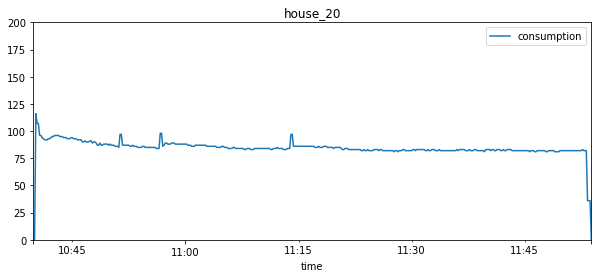

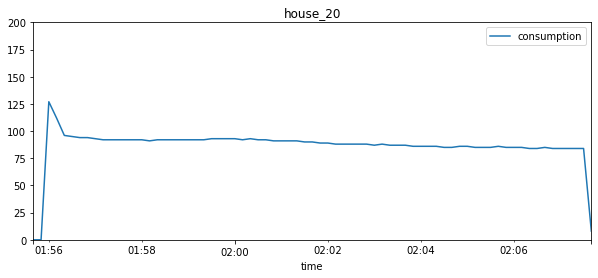

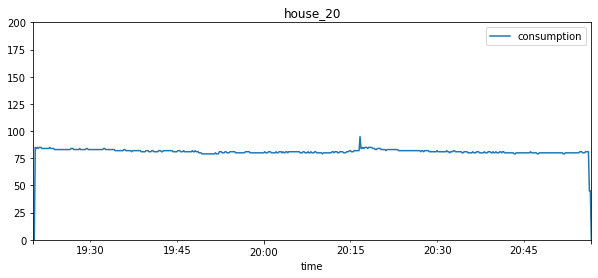

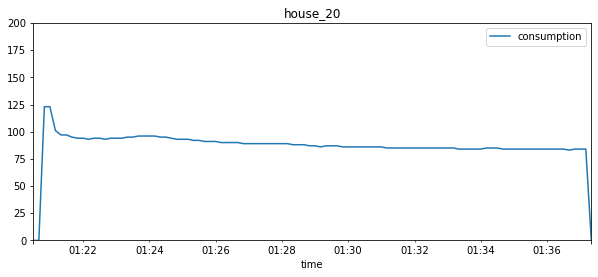

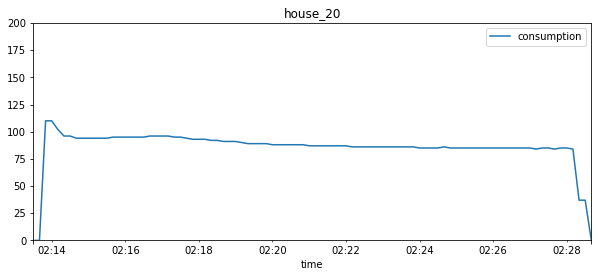

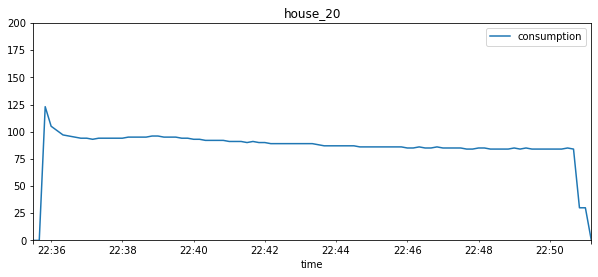

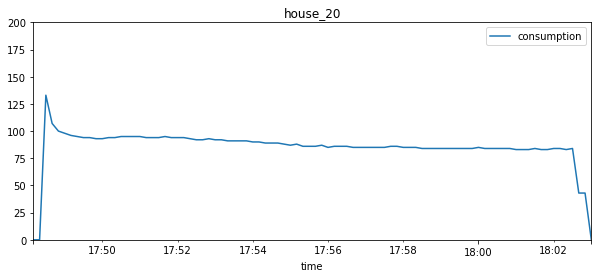

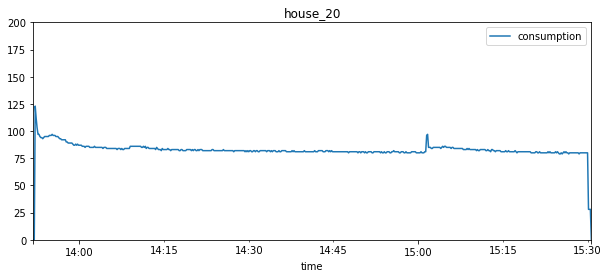

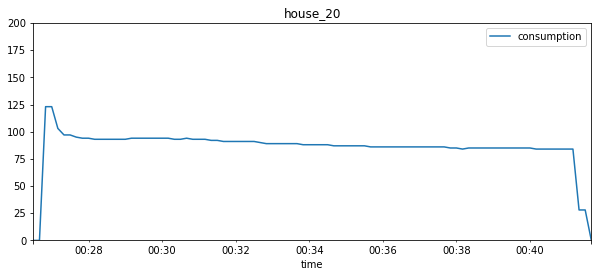

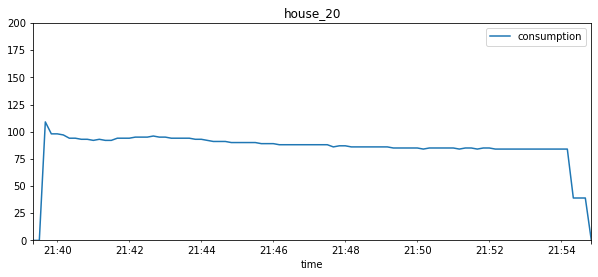

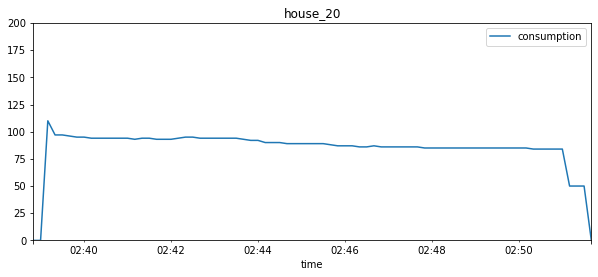

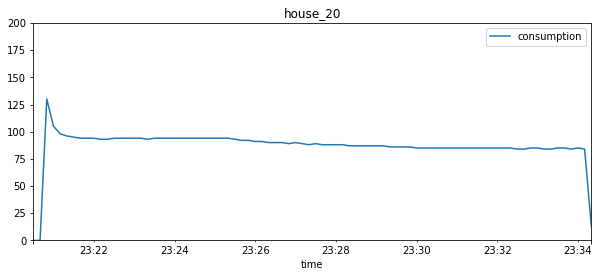

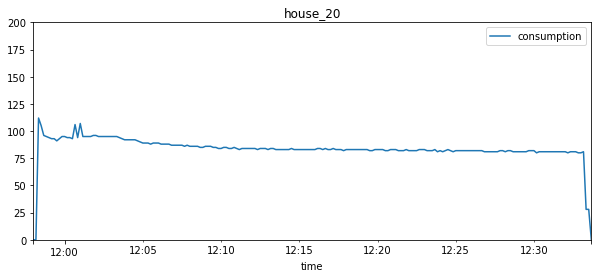

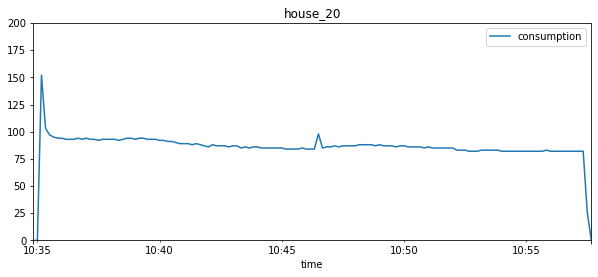

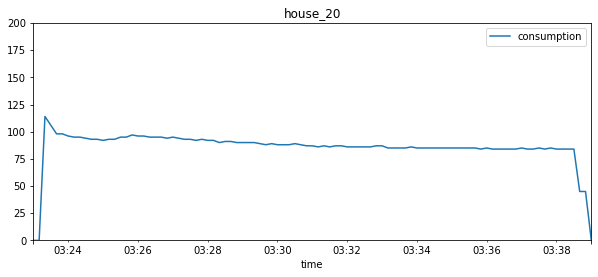

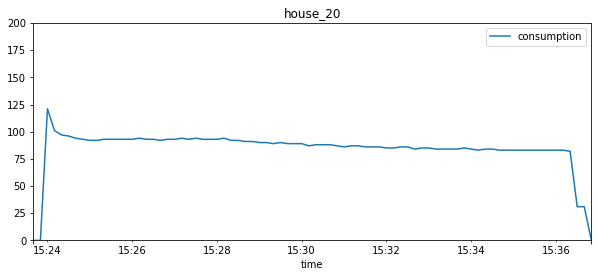

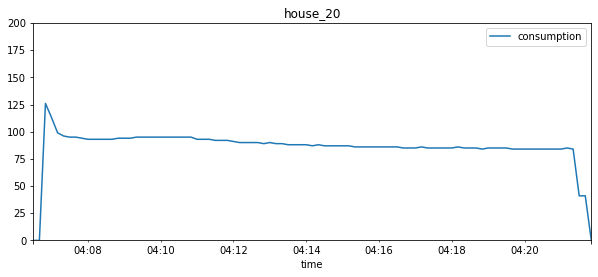

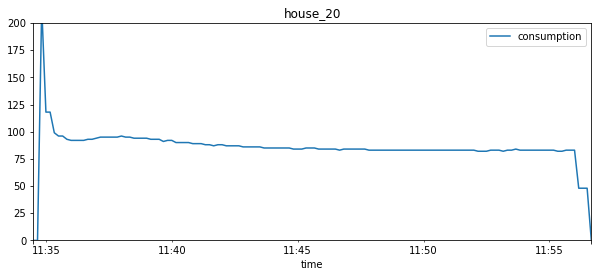

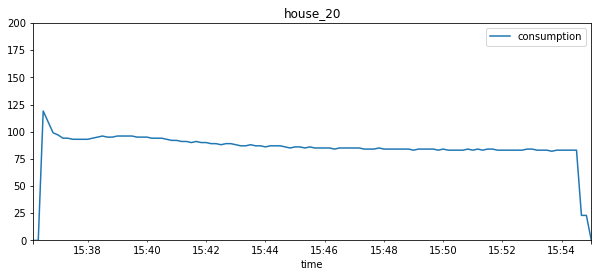

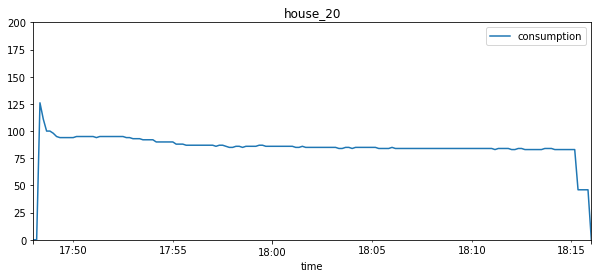

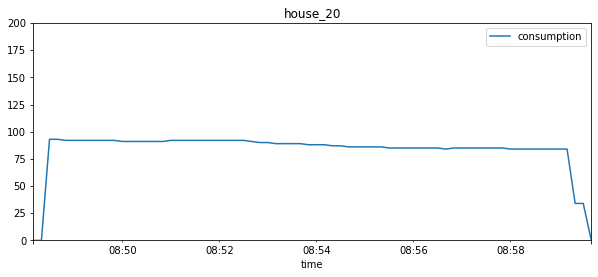

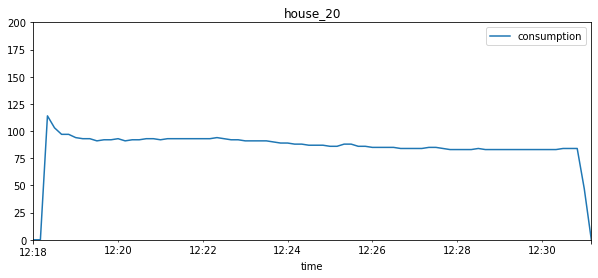

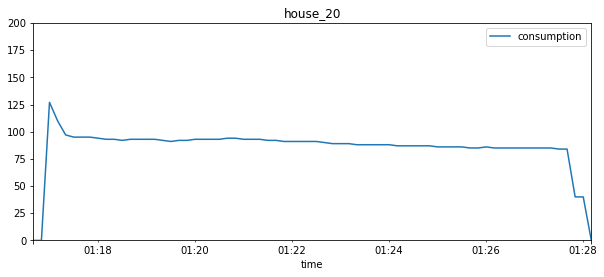

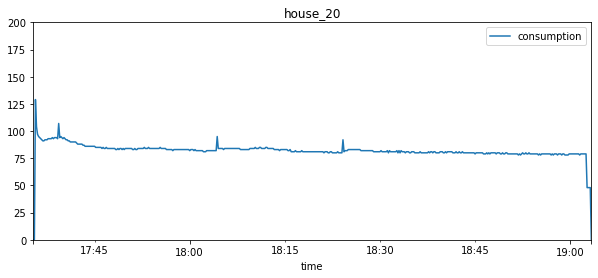

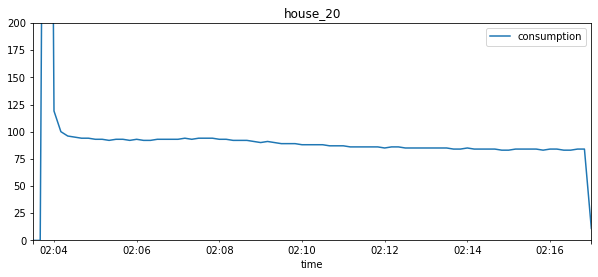

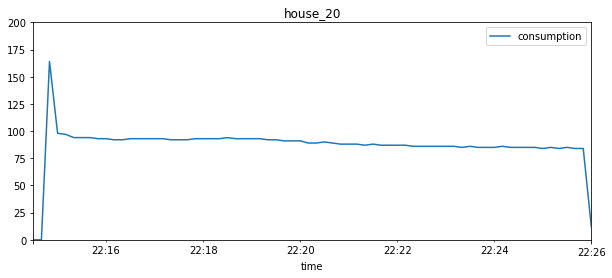

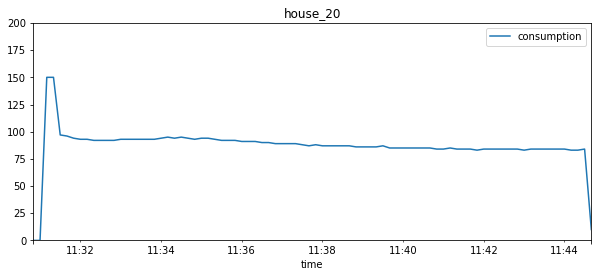

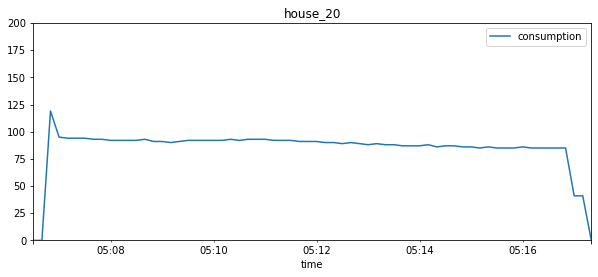

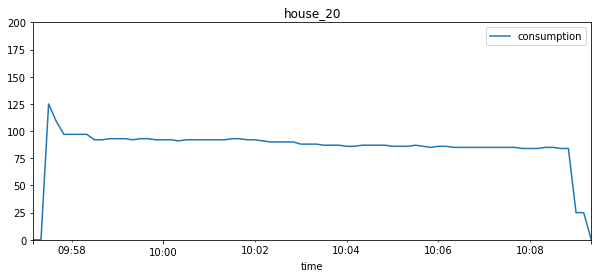

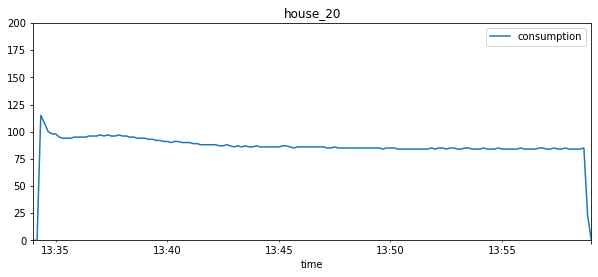

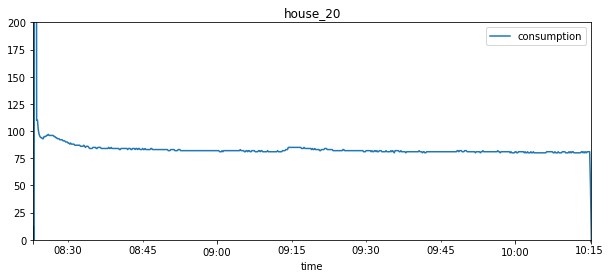

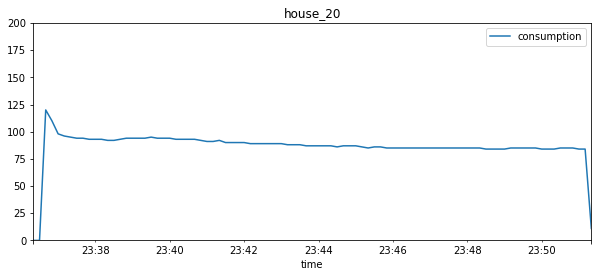

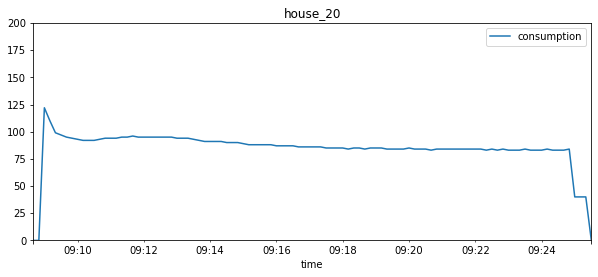

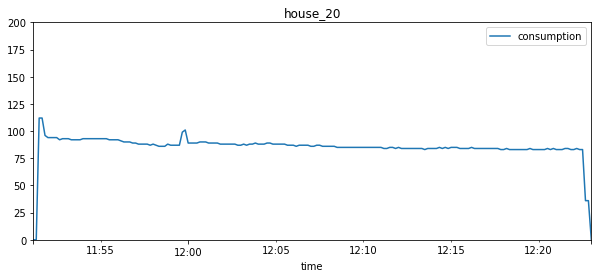

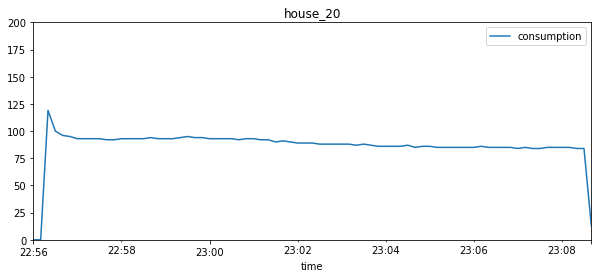

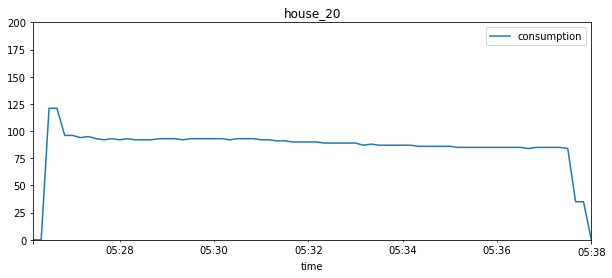

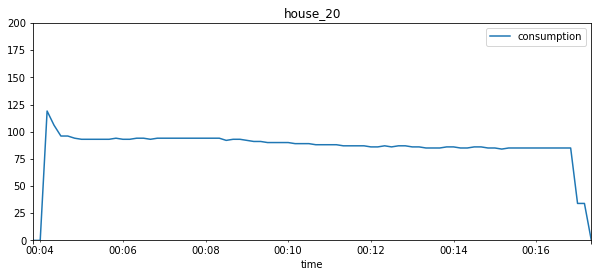

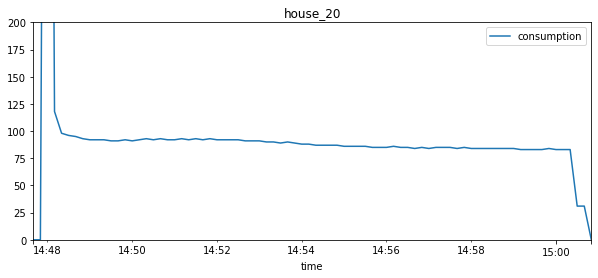

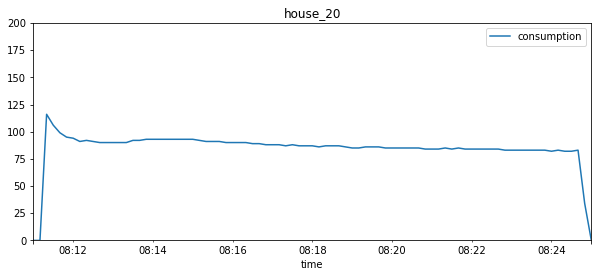

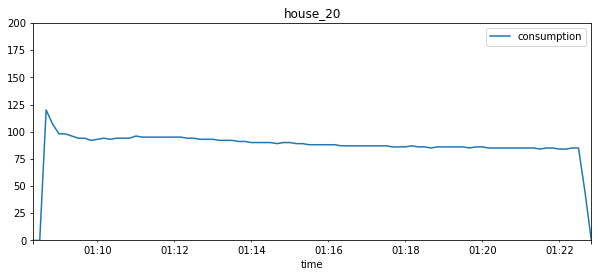

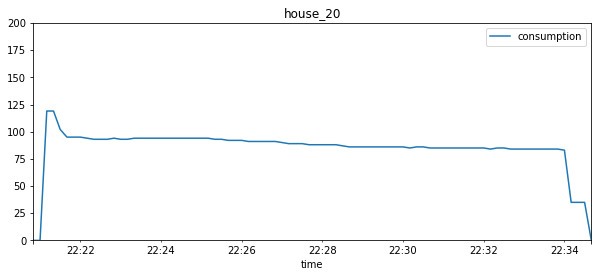

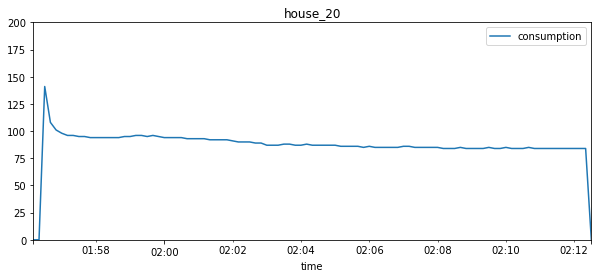

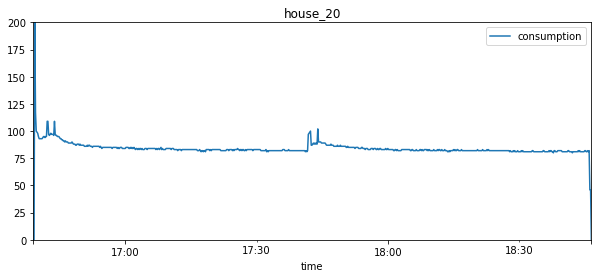

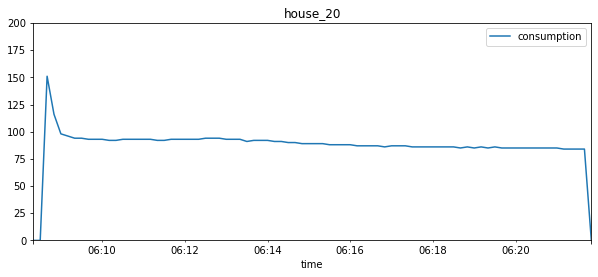

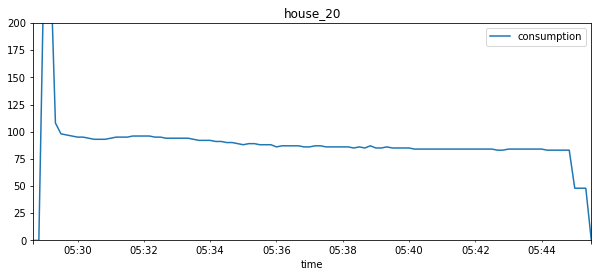

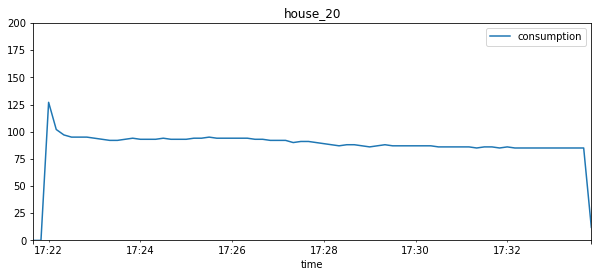

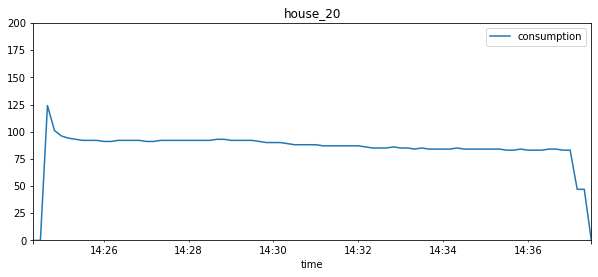

In [25]:
house=20
activations=random.sample(range(0, len(Refit_fridge_activations[house])),100)
df=Refit_fridges[house]
for activation in activations:
    beginning=Refit_fridge_activations[house][activation][0]
    end=Refit_fridge_activations[house][activation][1]
    ax=df.iloc[beginning:end].plot(x="time",y=['consumption'], figsize=(10,4),title="house_"+str(house))
    ax.set_ylim(0,200)

In [13]:
def activations_to_csv(activations,house_nb):
    df=pd.DataFrame(activations, columns =['beginning','end'])
    df.to_csv("Refit_activations/fridge/house_"+str(house_nb),index=False)

In [14]:
pool = mp.Pool(processes = 3)
result=pool.starmap(activations_to_csv,((Refit_fridge_activations[i],i) for i in Refit_fridge_activations.keys()))

In [18]:
data=Refit_fridge_activations[1]
df = pd.DataFrame(data, columns =['beginning','end'])
print(df)

      beginning      end
0             1       81
1           678      849
2          1401     1572
3          3050     3216
4          3907     4074
...         ...      ...
6151    5517001  5517180
6152    5517788  5517967
6153    5518585  5518762
6154    5519336  5519514
6155    5520110  5520291

[6156 rows x 2 columns]


In [27]:
for key in Refit_fridge_activations.keys():
    activations=Refit_fridge_activations[key]
    Refit_fridge_activations[key]=[]
    for activation in activations:
        if (round((activation[1]-activation[0])/6)<=4000):
            Refit_fridge_activations[key].append(activation)

In [29]:
def get_durations(activations):
    durations=[]
    for activation in activations:
        durations.append(round((activation[1]-activation[0])/6))
    return (durations)

In [30]:
Refit_fridges_durations=[]
for house in Refit_fridges.keys():
    Refit_fridges_durations.append(get_durations(Refit_fridge_activations[house]))

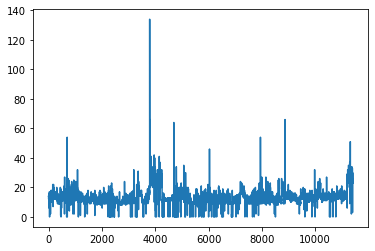

In [31]:
plt.plot(Refit_fridges_durations[2])

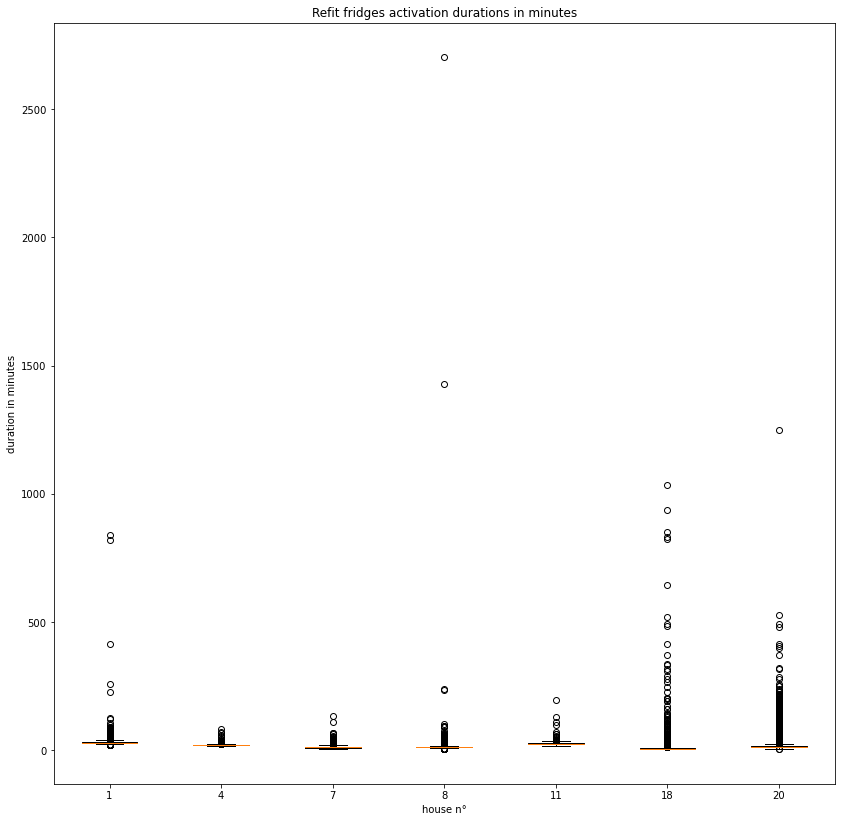

In [31]:
fig7, ax7 = plt.subplots(figsize=(14,14))
ax7.set_title('Refit fridges activation durations in minutes')
ax7.boxplot(Refit_fridges_durations)
#ax7.set_ylim(0,100)
ax7.set_xticklabels(Refit_fridges.keys())
plt.savefig('Refit_fridges_activation_durations_in_minutes_all.jpg',dpi=184)
plt.ylabel("duration in minutes")
plt.xlabel("house n°")
plt.show()

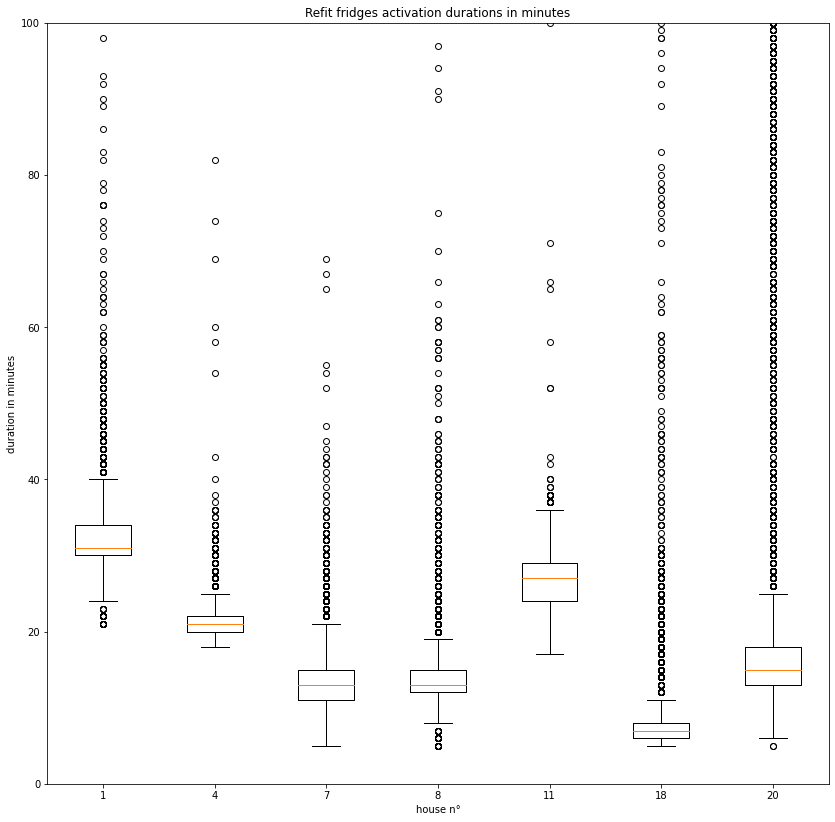

In [32]:
fig7, ax7 = plt.subplots(figsize=(14,14))
ax7.set_title('Refit fridges activation durations in minutes')
ax7.boxplot(Refit_fridges_durations)
ax7.set_ylim(0,100)
ax7.set_xticklabels(Refit_fridges.keys())
plt.savefig('Refit_fridges_activation_durations_in_minutes.jpg',dpi=184)
plt.ylabel("duration in minutes")
plt.xlabel("house n°")
plt.show()

In [33]:
nb_of_activations=[]
for key in Refit_fridge_activations.keys():
    nb_of_activations.append(len(Refit_fridge_activations[key]))

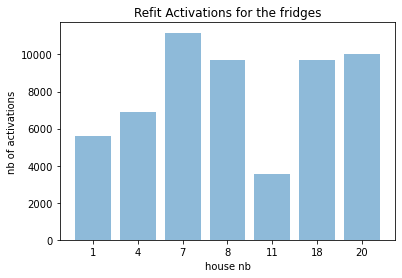

In [34]:
y_pos = np.arange(7)
plt.bar(y_pos,nb_of_activations, align='center', alpha=0.5)
plt.xticks(y_pos, Refit_fridge_activations.keys())
plt.ylabel('nb of activations')
plt.xlabel('house nb')
plt.title('Refit Activations for the fridges')
plt.show()

<ipython-input-38-f996a54dc314>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([1, 4, 7, 8, 11, 18, 20],fontsize=18)


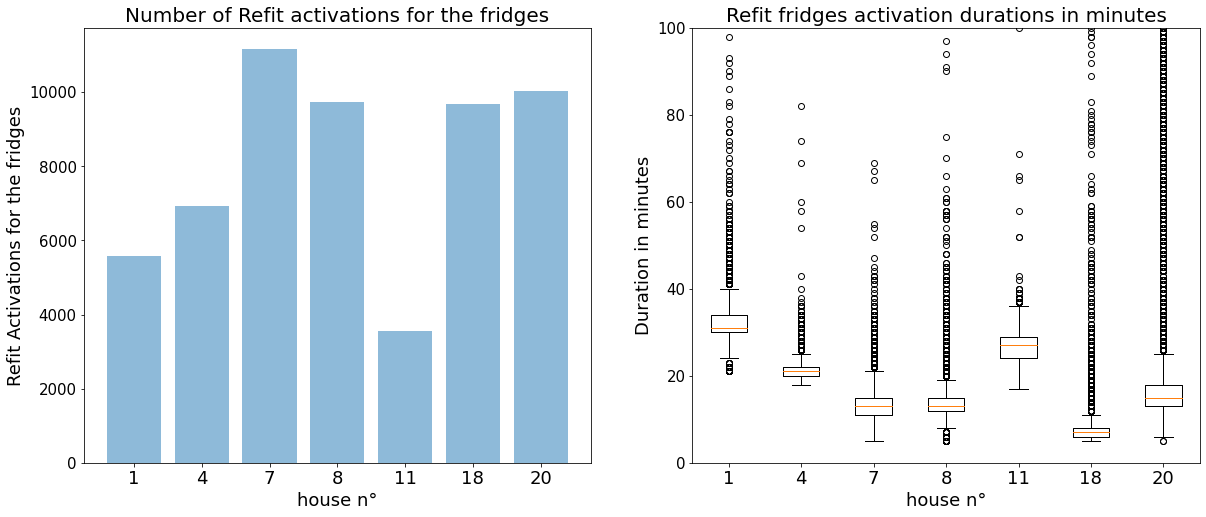

In [38]:
fig, (ax1, ax7) = plt.subplots(1,2,figsize=(20,8))

y_pos = np.arange(7)
ax1.bar(y_pos,nb_of_activations, align='center', alpha=0.5)
ax1.set_title('Number of Refit activations for the fridges',fontsize=20)
ax1.set_xlabel('house n°', fontsize=18)
ax1.set_ylabel('Refit Activations for the fridges', fontsize=18)
plt.setp(ax1.get_yticklabels(), fontsize=15)
ax1.set_xticklabels([1, 4, 7, 8, 11, 18, 20],fontsize=18)
ax1.xaxis.set_major_locator(matplotlib.ticker.FixedLocator([0,1,2,3,4,5,6,7]))

ax7.set_title('Refit fridges activation durations in minutes',fontsize=20)
ax7.boxplot(Refit_fridges_durations,vert=True)
ax7.set_ylim(0,100)
ax7.set_xticklabels(Refit_fridges.keys(),fontsize=18)
ax7.set_xlabel('house n°', fontsize=18)
ax7.set_ylabel('Duration in minutes', fontsize=18)
plt.setp(ax7.get_yticklabels(), fontsize=15)


plt.savefig('Number_durations_fridges.jpg',dpi=184)
plt.show()

In [39]:
def merge_activations(dataframe,list_of_activations,house_nb):
  power_consumption_list=[]
  for activation in list_of_activations:
    start=activation[0]
    end=activation[1]
    power_consumption_list.extend(dataframe.consumption.iloc[start:end+1])
  return(power_consumption_list,house_nb)

In [40]:
pool = mp.Pool(processes = 3)
result=pool.starmap(merge_activations,((Refit_fridges[i],Refit_fridge_activations[i],i) for i in Refit_fridge_activations.keys()))

In [41]:
Refit_activations_fridge_freezers={}
for i in range(len(result)):
    if result[i]!=None:
        Refit_activations_fridge_freezers[result[i][1]]=result[i][0]

In [50]:
Refit_activations_fridge_freezers[4].remove(Refit_activations_fridge_freezers[4][0])

In [42]:
activations_merged=[]
for key in Refit_activations_fridge_freezers.keys():
    activations_merged.append(Refit_activations_fridge_freezers[key])
len(activations_merged)

7

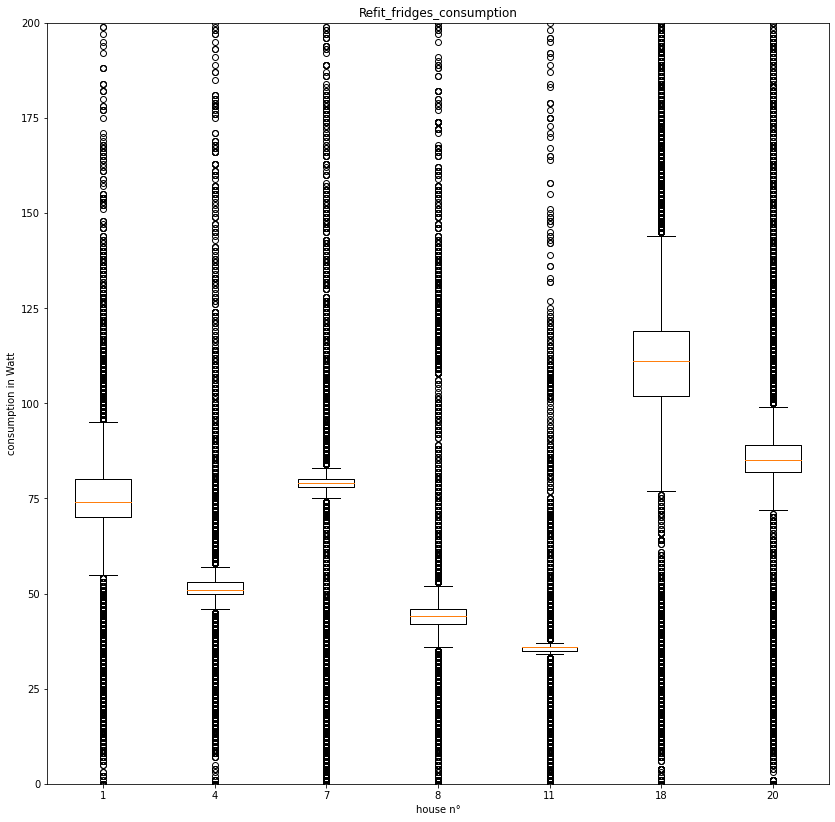

In [56]:
fig7, ax7 = plt.subplots(figsize=(14,14))
ax7.set_title('Refit_fridges_consumption')
ax7.boxplot(activations_merged)
ax7.set_ylim(0,200)
ax7.set_xticklabels(Refit_fridges.keys())
plt.savefig('Refit_fridges_consumption.jpg',dpi=184)
plt.ylabel("consumption in Watt")
plt.xlabel("house n°")
plt.show()

In [57]:
def get_summary_statistics(dataset):
    
    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)
    quartile_1 = np.round(dataset.quantile(0.25), 2)
    quartile_3 = np.round(dataset.quantile(0.75), 2)
    # Interquartile range
    iqr = np.round(quartile_3 - quartile_1, 2)
    print('Min: %s' % min_value)
    print('Mean: %s' % mean)
    print('Max: %s' % max_value)
    print('25th percentile: %s' % quartile_1)
    print('Median: %s' % median)
    print('75th percentile: %s' % quartile_3)
    print('Interquartile range (IQR): %s' % iqr)
    print('Setosa summary statistics')

In [59]:
print('\n\nDurations')
get_summary_statistics(activations_merged[1])
print('\n\nDurations')
get_summary_statistics(Refit_fridges_durations)



Durations


AttributeError: 'list' object has no attribute 'min'

<ipython-input-52-8229def21db0>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([1, 4, 7, 8, 11, 18, 20],fontsize=18)


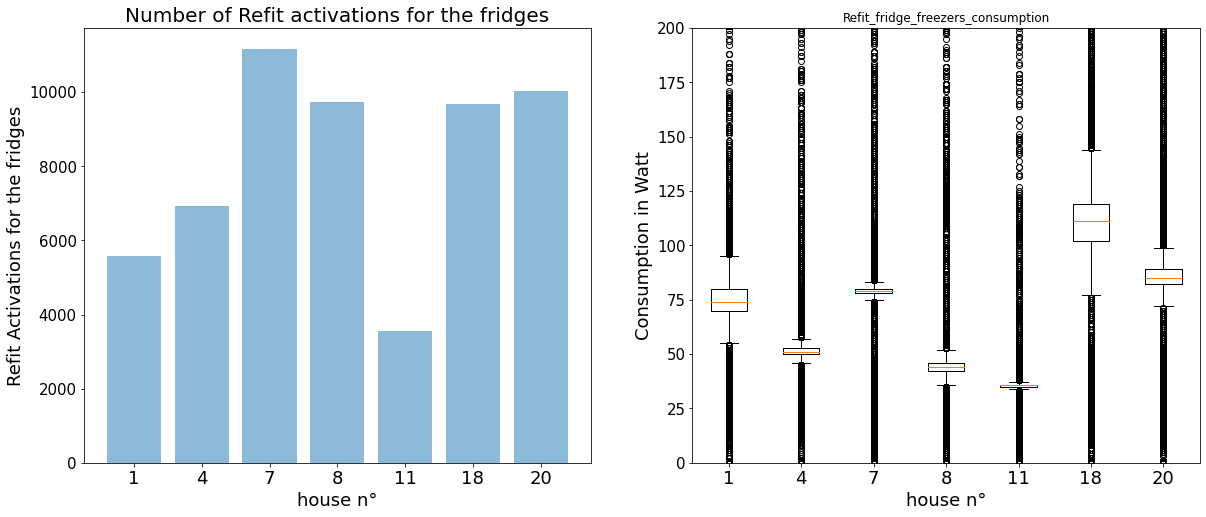

In [52]:
fig, (ax1, ax7) = plt.subplots(1,2,figsize=(20,8))

y_pos = np.arange(7)
ax1.bar(y_pos,nb_of_activations, align='center', alpha=0.5)
ax1.set_title('Number of Refit activations for the fridges',fontsize=20)
ax1.set_xlabel('house n°', fontsize=18)
ax1.set_ylabel('Refit Activations for the fridges', fontsize=18)
plt.setp(ax1.get_yticklabels(), fontsize=15)
ax1.set_xticklabels([1, 4, 7, 8, 11, 18, 20],fontsize=18)
ax1.xaxis.set_major_locator(matplotlib.ticker.FixedLocator([0,1,2,3,4,5,6,7]))

ax7.set_title('Refit_fridge_freezers_consumption')
ax7.boxplot(activations_merged)
ax7.set_ylim(0,200)
ax7.set_xticklabels(Refit_fridges.keys(),fontsize=18)
ax7.set_xlabel('house n°', fontsize=18)
ax7.set_ylabel('Consumption in Watt', fontsize=18)
plt.setp(ax7.get_yticklabels(), fontsize=15)

plt.savefig('Number_Consumption_fridges.jpg',dpi=184)
plt.show()